In [1]:
#Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns
import scipy as sp
from scipy import stats


In [2]:
Homicide_df_raw= pd.read_csv("Resources/Homicides Are Falling Around the World - Homicides Are Falling Around the World.csv")
Homicide_df_raw

Unnamed: 0 Intentional homicides (per 100,000 people)  Unnamed: 2  \
0       country           % change earliest to latest data     1995.00   
1       Croatia                                      -0.75        3.56   
2      Bulgaria                                      -0.70        5.91   
3   Netherlands                                      -0.69        1.94   
4    Kazakhstan                                      -0.69       15.36   
..          ...                                        ...         ...   
56        Nepal                                      -0.09         NaN   
57       Canada                                      -0.07        1.84   
58    Guatemala                                      -0.04       32.55   
59     Portugal                                      -0.04         NaN   
60       Mexico                                      -0.04       16.92   

    Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
0      1996.00     1997.00     1998.00     1999.00      2000.0      2001.0   
1         2.62        2.55        2.86        2.67         2.3         1.8   
2         5.29        4.85        4.69        4.05         NaN         NaN   
3         1.36        1.33        1.12        1.29         1.1         1.3   
4        16.71       16.67       16.58       15.74        15.5        14.5   
..         ...         ...         ...         ...         ...         ...   
56         NaN        2.53        2.80        2.64         2.7         3.5   
57        1.94        1.75        1.68        1.59         1.6         1.8   
58       35.32       38.14       30.87       24.19        24.8        27.0   
59        1.04        1.12        1.22        1.06         1.1         1.0   
60       15.45       14.20       14.08       12.43        10.4         9.9   

    Unnamed: 9  ...  Unnamed: 17  Unnamed: 18  Unnamed: 19  Unnamed: 20  \
0       2002.0  ...       2010.0       2011.0       2012.0       2013.0   
1          1.7  ...          1.4          1.1          1.2          1.1   
2          NaN  ...          2.0          1.7          1.9          1.5   
3          1.2  ...          0.9          0.9          0.9          0.7   
4         13.1  ...          8.6          8.6          7.5          6.5   
..         ...  ...          ...          ...          ...          ...   
56         3.5  ...          3.0          2.9          2.8          2.3   
57         1.7  ...          1.6          1.8          1.6          1.4   
58        29.6  ...         40.5         37.7         33.5         33.5   
59         1.1  ...          1.2          1.1          1.2          1.4   
60         9.6  ...         21.7         22.6         21.3         18.6   

    Unnamed: 21  Unnamed: 22      Unnamed: 23    Unnamed: 24  Unnamed: 25  \
0        2014.0       2015.0  earliest figure  latest figure       source   
1           0.8          0.9             3.56           0.90   World Bank   
2           1.6          1.8             5.91           1.80   World Bank   
3           0.7          0.6             1.94           0.60   World Bank   
4           5.2          4.8            15.36           4.80   World Bank   
..          ...          ...              ...            ...          ...   
56          2.3          NaN             2.53           2.30   World Bank   
57          1.5          1.7             1.84           1.70   World Bank   
58         31.2          NaN            32.55          31.20   World Bank   
59          0.9          1.0             1.04           1.00   World Bank   
60         16.0         16.3            16.92          16.30   World Bank   

                                          Unnamed: 26  
0                                                 URL  
1   https://data.worldbank.org/indicator/VC.IHR.PS...  
2   https://data.worldbank.org/indicator/VC.IHR.PS...  
3   https://data.worldbank.org/indicator/VC.IHR.PS...  
4   https://data.worldbank.org/indicator/VC.IHR.PS...  
..               

In [3]:
#Replace the header with the top row, due to how the csv was formatted
new_header = Homicide_df_raw.iloc[0] 
Homicide_df = Homicide_df_raw[1:] 
Homicide_df.columns = new_header
Homicide_df

0           country % change earliest to latest data  1995.0  1996.0  1997.0  \
1           Croatia                            -0.75    3.56    2.62    2.55   
2          Bulgaria                            -0.70    5.91    5.29    4.85   
3       Netherlands                            -0.69    1.94    1.36    1.33   
4        Kazakhstan                            -0.69   15.36   16.71   16.67   
5            Poland                            -0.68    2.22    2.27    2.10   
6           Albania                            -0.66    6.69    7.97   49.87   
7             China                            -0.65     NaN     NaN     NaN   
8           Georgia                            -0.65    7.71    5.41    5.79   
9           Moldova                            -0.65    9.10    9.29    9.32   
10  Slovak Republic                            -0.62    2.38    2.45    2.60   
11         Colombia                            -0.62   69.67   71.79   67.18   
12          Belarus                            -0.61    9.34    9.47   10.01   
13   Czech Republic                            -0.59    1.71    1.68    1.82   
14        Lithuania                            -0.57   13.83   11.24   10.93   
15  Kyrgyz Republic                            -0.56   11.65   11.14    9.26   
16          Romania                            -0.55    3.34    3.20    3.08   
17            Italy                            -0.55    1.78    1.67    1.53   
18           Serbia                            -0.54     NaN     NaN     NaN   
19         Thailand                            -0.54    7.61    7.42    7.86   
20          Germany                            -0.53    1.72    1.68    1.54   
21          Austria                            -0.52    1.03    1.24    0.83   
22        Indonesia                            -0.50     NaN     NaN     NaN   
23          Ireland                            -0.50    1.19    1.15    1.04   
24         Mongolia                            -0.48     NaN     NaN     NaN   
25          Hungary                            -0.48    2.87    2.63    2.81   
26          Morocco                            -0.47     NaN     NaN     NaN   
27     South Africa                            -0.47   64.92   60.39   57.11   
28         Slovenia                            -0.46    2.24    1.93    1.82   
29            Japan                            -0.45    0.54    0.49    0.54   
30        Australia                            -0.44    1.80    1.70    1.73   
31         Paraguay                            -0.44     NaN     NaN     NaN   
32          Finland                            -0.44    2.86    2.99    2.70   
33           Greece                            -0.43    1.41    1.57    1.88   
34          Ecuador                            -0.43     NaN     NaN     NaN   
35      Switzerland                            -0.40    1.17    1.18    1.23   
36    United States                            -0.40    8.11    7.29    6.68   
37           Norway                            -0.39    0.99    0.98    0.86   
38   United Kingdom                            -0.39    1.47    1.32    1.43   
39   Macedonia, FYR                            -0.34     NaN     NaN     NaN   
40           Israel                            -0.33    2.10    2.13    2.77   
41            Spain                            -0.33    1.04    1.00    1.17   
42            Libya                            -0.32     NaN     NaN     NaN   
43      Puerto Rico                            -0.32   23.34   23.26   19.25   
44           France                            -0.31    2.31    2.02    1.65   
45          Armenia                            -0.31    3.60    3.59    3.19   
46          Algeria                            -0.30     NaN     NaN     NaN   
47            India                            -0.27    4.37    4.40    4.35   
48      El Salvador                            -0.22  139.13  117.28  112.57   
49           Panama                            -0.19   14.08    9.08   11.30   


In [4]:
#Drop unwated categories
test = Homicide_df.drop(columns=["source", "URL"])
test

0           country % change earliest to latest data  1995.0  1996.0  1997.0  \
1           Croatia                            -0.75    3.56    2.62    2.55   
2          Bulgaria                            -0.70    5.91    5.29    4.85   
3       Netherlands                            -0.69    1.94    1.36    1.33   
4        Kazakhstan                            -0.69   15.36   16.71   16.67   
5            Poland                            -0.68    2.22    2.27    2.10   
6           Albania                            -0.66    6.69    7.97   49.87   
7             China                            -0.65     NaN     NaN     NaN   
8           Georgia                            -0.65    7.71    5.41    5.79   
9           Moldova                            -0.65    9.10    9.29    9.32   
10  Slovak Republic                            -0.62    2.38    2.45    2.60   
11         Colombia                            -0.62   69.67   71.79   67.18   
12          Belarus                            -0.61    9.34    9.47   10.01   
13   Czech Republic                            -0.59    1.71    1.68    1.82   
14        Lithuania                            -0.57   13.83   11.24   10.93   
15  Kyrgyz Republic                            -0.56   11.65   11.14    9.26   
16          Romania                            -0.55    3.34    3.20    3.08   
17            Italy                            -0.55    1.78    1.67    1.53   
18           Serbia                            -0.54     NaN     NaN     NaN   
19         Thailand                            -0.54    7.61    7.42    7.86   
20          Germany                            -0.53    1.72    1.68    1.54   
21          Austria                            -0.52    1.03    1.24    0.83   
22        Indonesia                            -0.50     NaN     NaN     NaN   
23          Ireland                            -0.50    1.19    1.15    1.04   
24         Mongolia                            -0.48     NaN     NaN     NaN   
25          Hungary                            -0.48    2.87    2.63    2.81   
26          Morocco                            -0.47     NaN     NaN     NaN   
27     South Africa                            -0.47   64.92   60.39   57.11   
28         Slovenia                            -0.46    2.24    1.93    1.82   
29            Japan                            -0.45    0.54    0.49    0.54   
30        Australia                            -0.44    1.80    1.70    1.73   
31         Paraguay                            -0.44     NaN     NaN     NaN   
32          Finland                            -0.44    2.86    2.99    2.70   
33           Greece                            -0.43    1.41    1.57    1.88   
34          Ecuador                            -0.43     NaN     NaN     NaN   
35      Switzerland                            -0.40    1.17    1.18    1.23   
36    United States                            -0.40    8.11    7.29    6.68   
37           Norway                            -0.39    0.99    0.98    0.86   
38   United Kingdom                            -0.39    1.47    1.32    1.43   
39   Macedonia, FYR                            -0.34     NaN     NaN     NaN   
40           Israel                            -0.33    2.10    2.13    2.77   
41            Spain                            -0.33    1.04    1.00    1.17   
42            Libya                            -0.32     NaN     NaN     NaN   
43      Puerto Rico                            -0.32   23.34   23.26   19.25   
44           France                            -0.31    2.31    2.02    1.65   
45          Armenia                            -0.31    3.60    3.59    3.19   
46          Algeria                            -0.30     NaN     NaN     NaN   
47            India                            -0.27    4.37    4.40    4.35   
48      El Salvador                            -0.22  139.13  117.28  112.57   
49           Panama                            -0.19   14.08    9.08   11.30   


In [5]:
#Bar graph of year 2015, countries with top 10 Homicide rates

index_number = 22

column_data = test.iloc[:, index_number]

sorted_column_data = column_data.sort_values(ascending=False)

top_10 = sorted_column_data.head(10)

top_10_counntry_names = test.loc[top_10.index, 'country']

plt.figure(figsize=(10,6))
ax = top_10.plot(kind='bar')
ax.set_xticks(range(len(top_10)))
ax.set_xticklabels(top_10_counntry_names, rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('2015 Homicide Rate per 100k people')
plt.tight_layout()
plt.savefig("Images/Fig1.png")
plt.show()



In [6]:
test2 = test.dropna()
test2 = test2.reset_index(drop=True)
test2

0           country % change earliest to latest data  1995.0  1996.0  1997.0  \
0           Croatia                            -0.75    3.56    2.62    2.55   
1       Netherlands                            -0.69    1.94    1.36    1.33   
2        Kazakhstan                            -0.69   15.36   16.71   16.67   
3            Poland                            -0.68    2.22    2.27    2.10   
4   Slovak Republic                            -0.62    2.38    2.45    2.60   
5          Colombia                            -0.62   69.67   71.79   67.18   
6    Czech Republic                            -0.59    1.71    1.68    1.82   
7   Kyrgyz Republic                            -0.56   11.65   11.14    9.26   
8           Romania                            -0.55    3.34    3.20    3.08   
9             Italy                            -0.55    1.78    1.67    1.53   
10         Thailand                            -0.54    7.61    7.42    7.86   
11          Germany                            -0.53    1.72    1.68    1.54   
12          Austria                            -0.52    1.03    1.24    0.83   
13          Ireland                            -0.50    1.19    1.15    1.04   
14     South Africa                            -0.47   64.92   60.39   57.11   
15         Slovenia                            -0.46    2.24    1.93    1.82   
16        Australia                            -0.44    1.80    1.70    1.73   
17          Finland                            -0.44    2.86    2.99    2.70   
18           Greece                            -0.43    1.41    1.57    1.88   
19      Switzerland                            -0.40    1.17    1.18    1.23   
20    United States                            -0.40    8.11    7.29    6.68   
21            Spain                            -0.33    1.04    1.00    1.17   
22           France                            -0.31    2.31    2.02    1.65   
23      El Salvador                            -0.22  139.13  117.28  112.57   
24           Panama                            -0.19   14.08    9.08   11.30   
25          Denmark                            -0.13    1.15    1.31    1.67   
26           Canada                            -0.07    1.84    1.94    1.75   
27           Mexico                            -0.04   16.92   15.45   14.20   

0   1998.0  1999.0  2000.0  2001.0  2002.0  ...  2008.0  2009.0  2010.0  \
0     2.86    2.67    2.30    1.80     1.7  ...     1.5     1.1     1.4   
1     1.12    1.29    1.10    1.30     1.2  ...     0.9     0.9     0.9   
2    16.58   15.74   15.50   14.50    13.1  ...    11.4    11.0     8.6   
3     4.87    4.75    2.20    2.00     1.9  ...     1.2     1.3     1.1   
4     2.37    2.61    2.70    2.40     2.6  ...     1.7     1.6     1.6   
5    60.08   62.29   65.70   67.90    68.3  ...    33.2    34.0    32.7   
6     1.69    1.68    1.80    1.40     1.5  ...     1.1     0.9     1.0   
7     8.81    8.84    8.70    7.70     8.2  ...     8.1     7.8    19.6   
8     2.51    2.54    2.50    2.70     2.6  ...     2.3     1.9     2.0   
9     1.54    1.42    1.30    1.20     1.1  ...     1.0     1.0     0.9   
10    8.69    8.10    8.20    7.90     7.1  ...     6.0     5.6     5.5   
11    1.21    1.24    1.20    1.10     1.2  ...     0.9     1.0     1.0   
12    0.97    0.75    1.00    0.90     0.8  ...     0.7     0.6     0.7   
13    1.03    1.01    0.10    1.30     1.3  ...     1.1     1.2     1.1   
14   57.74   51.21   48.50   47.00    46.6  ...    36.0    33.0    30.9   
15    0.71    1.26    1.80    1.40     1.8  ...     0.5     0.6     0.7   
16    1.52    1.81    1.90    1.80     1.9  ...     1.2     1.2     1.0   
17    2.19    2.77    2.90    3.00     2.5  ...     2.5     2.2     2.2   
18    1.62    1.42    0.70    1.20     0.9  ...     1.3     1.4     1.6   
19    1.07    1.25    0.96    1.20     1.2  ...     0.7     0.7     0.7   
20    6.15    5.56    5.50    6.70     5.6  ...     5.4     5.0     4.8   
21    1.31    1.22    1.40   

In [7]:
test2.astype({'% change earliest to latest data': 'float64'}).dtypes
test2

0           country % change earliest to latest data  1995.0  1996.0  1997.0  \
0           Croatia                            -0.75    3.56    2.62    2.55   
1       Netherlands                            -0.69    1.94    1.36    1.33   
2        Kazakhstan                            -0.69   15.36   16.71   16.67   
3            Poland                            -0.68    2.22    2.27    2.10   
4   Slovak Republic                            -0.62    2.38    2.45    2.60   
5          Colombia                            -0.62   69.67   71.79   67.18   
6    Czech Republic                            -0.59    1.71    1.68    1.82   
7   Kyrgyz Republic                            -0.56   11.65   11.14    9.26   
8           Romania                            -0.55    3.34    3.20    3.08   
9             Italy                            -0.55    1.78    1.67    1.53   
10         Thailand                            -0.54    7.61    7.42    7.86   
11          Germany                            -0.53    1.72    1.68    1.54   
12          Austria                            -0.52    1.03    1.24    0.83   
13          Ireland                            -0.50    1.19    1.15    1.04   
14     South Africa                            -0.47   64.92   60.39   57.11   
15         Slovenia                            -0.46    2.24    1.93    1.82   
16        Australia                            -0.44    1.80    1.70    1.73   
17          Finland                            -0.44    2.86    2.99    2.70   
18           Greece                            -0.43    1.41    1.57    1.88   
19      Switzerland                            -0.40    1.17    1.18    1.23   
20    United States                            -0.40    8.11    7.29    6.68   
21            Spain                            -0.33    1.04    1.00    1.17   
22           France                            -0.31    2.31    2.02    1.65   
23      El Salvador                            -0.22  139.13  117.28  112.57   
24           Panama                            -0.19   14.08    9.08   11.30   
25          Denmark                            -0.13    1.15    1.31    1.67   
26           Canada                            -0.07    1.84    1.94    1.75   
27           Mexico                            -0.04   16.92   15.45   14.20   

0   1998.0  1999.0  2000.0  2001.0  2002.0  ...  2008.0  2009.0  2010.0  \
0     2.86    2.67    2.30    1.80     1.7  ...     1.5     1.1     1.4   
1     1.12    1.29    1.10    1.30     1.2  ...     0.9     0.9     0.9   
2    16.58   15.74   15.50   14.50    13.1  ...    11.4    11.0     8.6   
3     4.87    4.75    2.20    2.00     1.9  ...     1.2     1.3     1.1   
4     2.37    2.61    2.70    2.40     2.6  ...     1.7     1.6     1.6   
5    60.08   62.29   65.70   67.90    68.3  ...    33.2    34.0    32.7   
6     1.69    1.68    1.80    1.40     1.5  ...     1.1     0.9     1.0   
7     8.81    8.84    8.70    7.70     8.2  ...     8.1     7.8    19.6   
8     2.51    2.54    2.50    2.70     2.6  ...     2.3     1.9     2.0   
9     1.54    1.42    1.30    1.20     1.1  ...     1.0     1.0     0.9   
10    8.69    8.10    8.20    7.90     7.1  ...     6.0     5.6     5.5   
11    1.21    1.24    1.20    1.10     1.2  ...     0.9     1.0     1.0   
12    0.97    0.75    1.00    0.90     0.8  ...     0.7     0.6     0.7   
13    1.03    1.01    0.10    1.30     1.3  ...     1.1     1.2     1.1   
14   57.74   51.21   48.50   47.00    46.6  ...    36.0    33.0    30.9   
15    0.71    1.26    1.80    1.40     1.8  ...     0.5     0.6     0.7   
16    1.52    1.81    1.90    1.80     1.9  ...     1.2     1.2     1.0   
17    2.19    2.77    2.90    3.00     2.5  ...     2.5     2.2     2.2   
18    1.62    1.42    0.70    1.20     0.9  ...     1.3     1.4     1.6   
19    1.07    1.25    0.96    1.20     1.2  ...     0.7     0.7     0.7   
20    6.15    5.56    5.50    6.70     5.6  ...     5.4     5.0     4.8   
21    1.31    1.22    1.40   

In [8]:
#Narrow the data to focus on some developed European country to get an overall picture of the data
change = test2.loc[(test2["country"] == "France") | (test2["country"] == "Spain") | (test2["country"] == "Greece") | (test2["country"] == "Italy") | (test2["country"] == "Germany") | (test2["country"] == "Poland")]
change = change.reset_index(drop=True)
change

0  country % change earliest to latest data  1995.0  1996.0  1997.0  1998.0  \
0   Poland                            -0.68    2.22    2.27    2.10    4.87   
1    Italy                            -0.55    1.78    1.67    1.53    1.54   
2  Germany                            -0.53    1.72    1.68    1.54    1.21   
3   Greece                            -0.43    1.41    1.57    1.88    1.62   
4    Spain                            -0.33    1.04    1.00    1.17    1.31   
5   France                            -0.31    2.31    2.02    1.65    1.64   

0  1999.0  2000.0  2001.0  2002.0  ...  2008.0  2009.0  2010.0  2011.0  \
0    4.75     2.2     2.0     1.9  ...     1.2     1.3     1.1     1.2   
1    1.42     1.3     1.2     1.1  ...     1.0     1.0     0.9     0.9   
2    1.24     1.2     1.1     1.2  ...     0.9     1.0     1.0     0.9   
3    1.42     0.7     1.2     0.9  ...     1.3     1.4     1.6     1.6   
4    1.22     1.4     1.4     1.3  ...     0.9     0.9     0.9     0.8   
5    1.62     1.8     1.8     1.9  ...     1.6     1.3     1.3     1.4   

0  2012.0  2013.0  2014.0  2015.0  earliest figure  latest figure  
0     1.0     0.8     0.7     0.7             2.22           0.70  
1     0.9     0.8     0.8     0.8             1.78           0.80  
2     0.8     0.8     0.9     0.8             1.72           0.80  
3     1.5     1.4     1.0     0.8             1.41           0.80  
4     0.8     0.7     0.7     0.7             1.04           0.70  
5     1.2     1.2     1.2     1.6             2.31           1.60  

[6 rows x 25 columns]

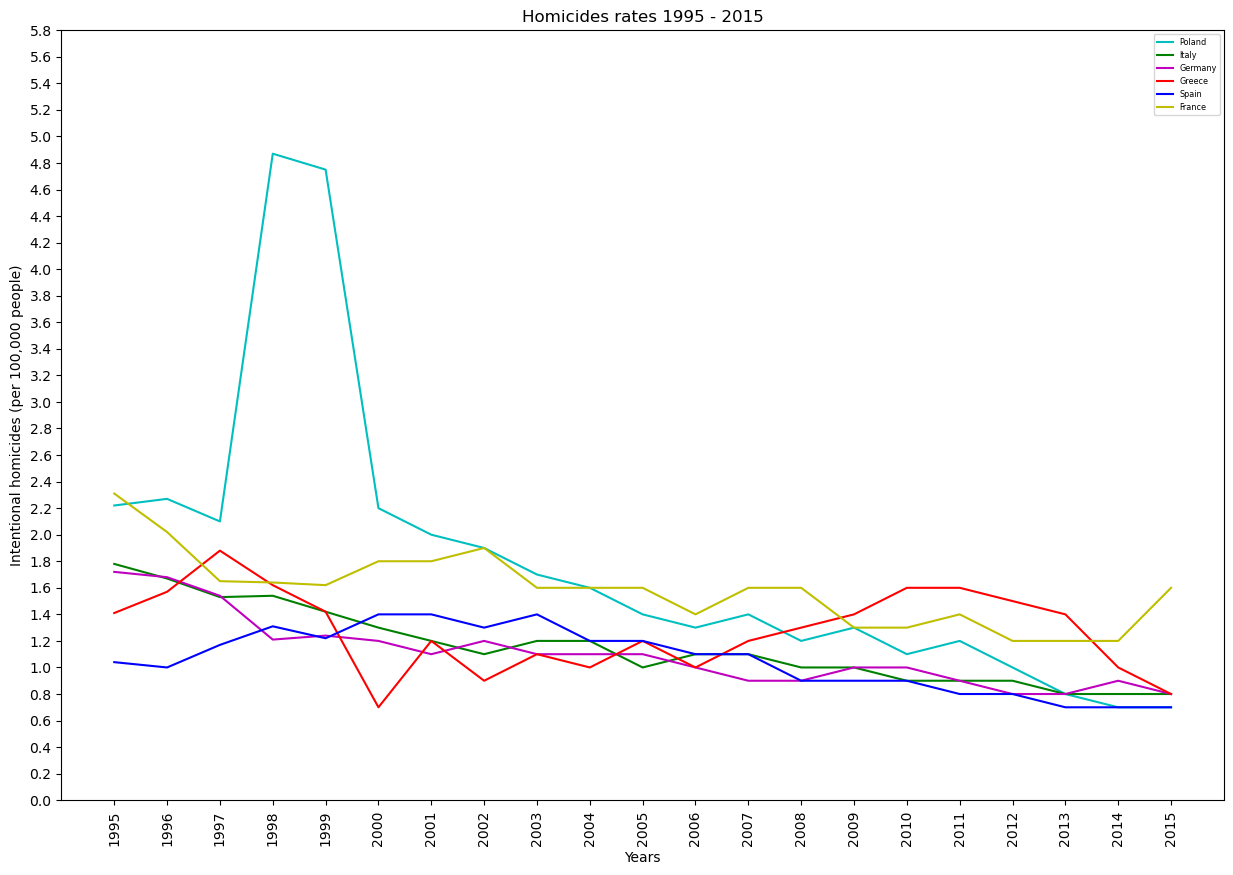

In [9]:
#Plot of homicide rates per year (1995-2015) for selected countries 
listarray = np.arange(1995, 2016)

colordict = {"Italy": "g",
            "France":"y",
            "Greece":"r",
            "Spain":"b",
            "Germany":"m",
            "Poland":"c"}
colordict

plt.figure(figsize=(15,10))
for i in range(len(change["country"])):
    plt.plot(listarray,change.iloc[i,2:23],c=colordict[change["country"][i]])
plt.xticks(listarray,rotation=90)
plt.yticks(np.arange(0, 6, 0.2))
plt.xlabel("Years")
plt.ylabel("Intentional homicides (per 100,000 people)")
plt.title("Homicides rates 1995 - 2015")
plt.legend(change['country'],loc='best', fontsize = 'xx-small')
plt.savefig("Images/Fig2.png")
plt.show()


In [10]:
#Drop extraneous columns
Homicide_df_final = Homicide_df.drop(columns=["source", "URL"])

#Rename column name to match freedom dataframe columns
Homicide_df_final = Homicide_df_final.rename(columns={"country": "Country"})

#Convert column data from object to float to represent a percentage
Homicide_df_final["% change earliest to latest data"] = pd.to_numeric(Homicide_df_final["% change earliest to latest data"])
Homicide_df_final["% change earliest to latest data"] = Homicide_df_final["% change earliest to latest data"]*100
Homicide_df_final

0           Country  % change earliest to latest data  1995.0  1996.0  1997.0  \
1           Croatia                             -75.0    3.56    2.62    2.55   
2          Bulgaria                             -70.0    5.91    5.29    4.85   
3       Netherlands                             -69.0    1.94    1.36    1.33   
4        Kazakhstan                             -69.0   15.36   16.71   16.67   
5            Poland                             -68.0    2.22    2.27    2.10   
6           Albania                             -66.0    6.69    7.97   49.87   
7             China                             -65.0     NaN     NaN     NaN   
8           Georgia                             -65.0    7.71    5.41    5.79   
9           Moldova                             -65.0    9.10    9.29    9.32   
10  Slovak Republic                             -62.0    2.38    2.45    2.60   
11         Colombia                             -62.0   69.67   71.79   67.18   
12          Belarus                             -61.0    9.34    9.47   10.01   
13   Czech Republic                             -59.0    1.71    1.68    1.82   
14        Lithuania                             -57.0   13.83   11.24   10.93   
15  Kyrgyz Republic                             -56.0   11.65   11.14    9.26   
16          Romania                             -55.0    3.34    3.20    3.08   
17            Italy                             -55.0    1.78    1.67    1.53   
18           Serbia                             -54.0     NaN     NaN     NaN   
19         Thailand                             -54.0    7.61    7.42    7.86   
20          Germany                             -53.0    1.72    1.68    1.54   
21          Austria                             -52.0    1.03    1.24    0.83   
22        Indonesia                             -50.0     NaN     NaN     NaN   
23          Ireland                             -50.0    1.19    1.15    1.04   
24         Mongolia                             -48.0     NaN     NaN     NaN   
25          Hungary                             -48.0    2.87    2.63    2.81   
26          Morocco                             -47.0     NaN     NaN     NaN   
27     South Africa                             -47.0   64.92   60.39   57.11   
28         Slovenia                             -46.0    2.24    1.93    1.82   
29            Japan                             -45.0    0.54    0.49    0.54   
30        Australia                             -44.0    1.80    1.70    1.73   
31         Paraguay                             -44.0     NaN     NaN     NaN   
32          Finland                             -44.0    2.86    2.99    2.70   
33           Greece                             -43.0    1.41    1.57    1.88   
34          Ecuador                             -43.0     NaN     NaN     NaN   
35      Switzerland                             -40.0    1.17    1.18    1.23   
36    United States                             -40.0    8.11    7.29    6.68   
37           Norway                             -39.0    0.99    0.98    0.86   
38   United Kingdom                             -39.0    1.47    1.32    1.43   
39   Macedonia, FYR                             -34.0     NaN     NaN     NaN   
40           Israel                             -33.0    2.10    2.13    2.77   
41            Spain                             -33.0    1.04    1.00    1.17   
42            Libya                             -32.0     NaN     NaN     NaN   
43      Puerto Rico                             -32.0   23.34   23.26   19.25   
44           France                             -31.0    2.31    2.02    1.65   
45          Armenia                             -31.0    3.60    3.59    3.19   
46          Algeria                             -30.0     NaN     NaN     NaN   
47            India                             -27.0    4.37    4.40    4.35   
48      El Salvador                             -22.0  139.13  117.28  112.57   
49           Panama            

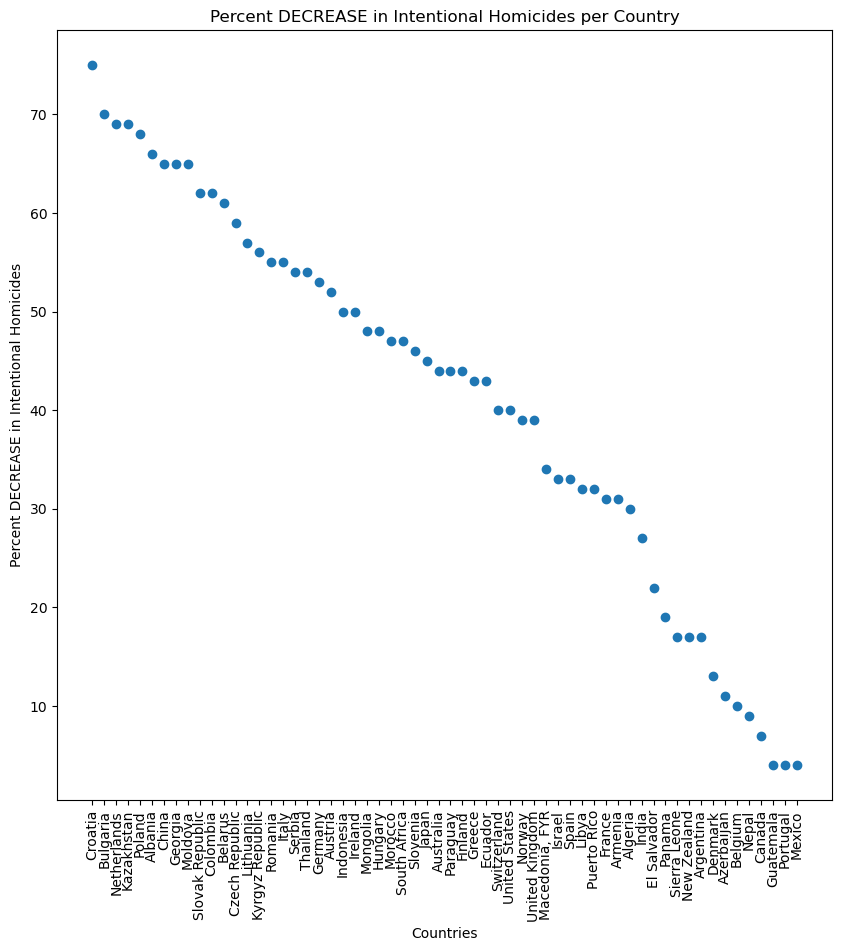

In [11]:
#Contruct a graph of the decreasing homicide rates for each country
plt.figure(figsize=(10,10))
plt.scatter(Homicide_df_final["Country"],abs(Homicide_df_final["% change earliest to latest data"]))
plt.xticks(Homicide_df_final["Country"],rotation=90)
plt.xlabel("Countries")
plt.ylabel("Percent DECREASE in Intentional Homicides")
plt.title("Percent DECREASE in Intentional Homicides per Country")
plt.savefig("Images/Fig3.png")
plt.show()

In [12]:
#Read csv file for the freedom score data
Freedom_df_raw = pd.read_csv("Resources/freedom-scores.csv")

#Drop all rows that are missing an overall freedom score
Freedom_df = Freedom_df_raw.dropna(subset=['Overall Score'])
Freedom_df

Id        Name Short Name ISO Code  Index Year  Overall Score  \
1       2     Albania    Albania       AL        2023           65.3   
2       3     Algeria    Algeria       DZ        2023           43.2   
3       4      Angola     Angola       AO        2023           53.0   
4       5   Argentina  Argentina       AR        2023           51.0   
5       6     Armenia    Armenia       AM        2023           65.1   
...   ...         ...        ...      ...         ...            ...   
5334  179  Venezuela   Venezuela       VE        1995           59.8   
5335  180     Vietnam    Vietnam       VN        1995           41.7   
5336  181       Yemen      Yemen       YE        1995           49.8   
5337  182      Zambia     Zambia       ZM        1995           55.1   
5338  183    Zimbabwe   Zimbabwe       ZW        1995           48.5   

      Property Rights  Judicial Effectiveness  Government Integrity  \
1                55.9                    49.2                  35.5   
2                27.8                    29.5                  28.4   
3                41.1                    24.8                  22.9   
4                34.6                    56.8                  42.8   
5                50.3                    31.5                  51.6   
...               ...                     ...                   ...   
5334             50.0                     NaN                  10.0   
5335             10.0                     NaN                  10.0   
5336             30.0                     NaN                  10.0   
5337             50.0                     NaN                  30.0   
5338             50.0                     NaN                  30.0   

      Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
1           89.1                 71.0           58.2              70.7   
2           71.9                 50.7           12.1              53.6   
3           86.5                 86.9           85.1              41.6   
4           66.9                 53.9           33.6              55.5   
5           87.5                 76.3           71.4              64.9   
...          ...                  ...            ...               ...   
5334        80.0                 76.1            NaN              85.0   
5335        68.8                 87.1            NaN              40.0   
5336        78.2                 73.4            NaN              70.0   
5337        72.4                 74.8            NaN              55.0   
5338        50.1                 65.3            NaN              55.0   

      Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
1              49.7              81.3           82.8                70.0   
2              51.4              75.1           57.5                30.0   
3              53.9              58.9           64.8                30.0   
4              55.1              36.5           61.2                55.0   
5              58.7              70.5           73.6                75.0   
...             ...               ...            ...                 ...   
5334            NaN              52.0           65.0                50.0   
5335            NaN              55.2           44.6                30.0   
5336            NaN              41.8           45.0                70.0   
5337            NaN              12.2           61.2                70.0   
5338            NaN              54.7           51.8                30.0   

      Financial Freedom  
1                  70.0  
2                  30.0  
3                  40.0  
4                  60.0  
5                  70.0  
...                 ...  
5334               70.0  
5335               30.0  
5336               30.0  
5337               70.0  
5338               50.0  

[4794 rows x 18 columns]

In [13]:
#Create a dataframe specifically for the year 2015, a dataframe with every unique country with a 2015 score
Freedom_df_final = Freedom_df.loc[(Freedom_df["Index Year"] == 2015)]

#Drop the Country 'North Korea' as an outlier. Their data points reduces the visibility for the graphs.
Freedom_df_final = Freedom_df_final.drop([1572])
Freedom_df_final = Freedom_df_final.reset_index(drop = True)
Freedom_df_final

Id               Name Short Name ISO Code  Index Year  Overall Score  \
0      2            Albania    Albania       AL        2015           65.7   
1      3            Algeria    Algeria       DZ        2015           48.9   
2      4             Angola     Angola       AO        2015           47.9   
3      5          Argentina  Argentina       AR        2015           44.1   
4      6            Armenia    Armenia       AM        2015           67.1   
..   ...                ...        ...      ...         ...            ...   
172  180            Vietnam    Vietnam       VN        2015           51.7   
173  181              Yemen      Yemen       YE        2015           53.7   
174  182             Zambia     Zambia       ZM        2015           58.7   
175  183           Zimbabwe   Zimbabwe       ZW        2015           37.6   
176  186  Brunei Darussalam     Brunei       BN        2015           68.9   

     Property Rights  Judicial Effectiveness  Government Integrity  \
0               30.0                     NaN                  31.0   
1               30.0                     NaN                  36.0   
2               15.0                     NaN                  23.0   
3               15.0                     NaN                  34.0   
4               20.0                     NaN                  36.0   
..               ...                     ...                   ...   
172             15.0                     NaN                  31.0   
173             30.0                     NaN                  18.0   
174             30.0                     NaN                  38.0   
175             10.0                     NaN                  21.0   
176             35.0                     NaN                  60.0   

     Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
0          87.2                 76.1            NaN              70.6   
1          80.0                 38.7            NaN              66.6   
2          84.5                 50.1            NaN              47.4   
3          66.8                 41.2            NaN              52.8   
4          84.4                 82.8            NaN              82.7   
..          ...                  ...            ...               ...   
172        79.1                 77.1            NaN              61.5   
173        91.5                 59.9            NaN              54.0   
174        71.9                 78.0            NaN              68.2   
175        66.6                 74.2            NaN              37.1   
176        87.0                 63.6            NaN              68.3   

     Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
0             52.9              80.8           87.8                70.0   
1             50.5              71.2           60.8                25.0   
2             43.2              65.4           70.2                40.0   
3             43.3              59.6           68.8                30.0   
4             64.3              70.6           85.4                75.0   
..             ...               ...            ...                 ...   
172           62.9              66.8           78.6                15.0   
173           57.1              68.5           77.6                50.0   
174           46.0              73.2           76.8                55.0   
175           23.7              75.4           58.4                 0.0   
176           96.9              76.6           81.8                70.0   

     Financial Freedom  
0                 70.0  
1                 30.0  
2                 40.0  
3                 30.0  
4                 70.0  
..                 ...  
172               30.0  
173               30.0  
174               50.0  
175               10.0  
176               50.0  

[177 rows x 18 columns]

In [14]:
#Dataframe that stores the calculated % change in freedom score
#For loop performs the following computation for each unique country: (FreedomScore in 2015 - FreedomScore in their first recorded year / FreedomScore in 2015)
Country = []
Percentfreedomscore = []
for i in Freedom_df_final["Short Name"]:
        Percentfreedomscore.append(((Freedom_df.loc[(Freedom_df["Index Year"] == 2015) & (Freedom_df["Short Name"] == i)]["Overall Score"].reset_index(drop=True) 
                                     - Freedom_df.loc[(Freedom_df["Index Year"] == Freedom_df.loc[Freedom_df["Short Name"] == i]["Index Year"].min()) & (Freedom_df["Short Name"] == i)]["Overall Score"].reset_index(drop=True)) 
                                    / Freedom_df.loc[(Freedom_df["Index Year"] == 2015) & (Freedom_df["Short Name"] == i)]["Overall Score"].reset_index(drop=True)).iloc[0])
        Country.append(i)
        
#Convert number to a percentage       
Percentfreedomscore = np.round(Percentfreedomscore, 2)
Percentfreedomscore = Percentfreedomscore * 100

#Combine the arrays into a single dataframe
Percentfreedomscore_df = pd.DataFrame({"Country": Country,
                                      "% Change in Freedom Score": Percentfreedomscore})
Percentfreedomscore_df = Percentfreedomscore_df.sort_values(by="% Change in Freedom Score", ascending=False)
Percentfreedomscore_df

Country  % Change in Freedom Score
7                Azerbaijan                       51.0
18        BosniaHerzegovina                       50.0
2                    Angola                       43.0
106                 Moldova                       43.0
131                  Rwanda                       41.0
..                      ...                        ...
17                  Bolivia                      -21.0
175                Zimbabwe                      -29.0
29   CentralAfricanRepublic                      -30.0
3                 Argentina                      -54.0
171               Venezuela                      -74.0

[177 rows x 2 columns]

In [15]:
#Dataframe that stores the calculated # change in freedom score
#For loop performs the following computation for each unique country: (FreedomScore in 2015 - FreedomScore in their first recorded year)
Country2 = []
Percentfreedomscore2 = []
for i in Freedom_df_final["Short Name"]:
        Percentfreedomscore2.append(((Freedom_df.loc[(Freedom_df["Index Year"] == 2015) & (Freedom_df["Short Name"] == i)]["Overall Score"].reset_index(drop=True)).iloc[0]) - (Freedom_df.loc[(Freedom_df["Index Year"] == Freedom_df.loc[Freedom_df["Short Name"] == i]["Index Year"].min()) & (Freedom_df["Short Name"] == i)]["Overall Score"].reset_index(drop=True).iloc[0]))
        Country2.append(i)  

#Round the numbers
Percentfreedomscore2 = np.round(Percentfreedomscore2, 2)

#Combine arrays into a single dataframe
Percentfreedomscore_df2 = pd.DataFrame({"Country": Country2,
                                      "# Change in Freedom Score": Percentfreedomscore2})
Percentfreedomscore_df2 = Percentfreedomscore_df2.sort_values(by="# Change in Freedom Score", ascending=False)
Percentfreedomscore_df2

Country  # Change in Freedom Score
7                Azerbaijan                       31.0
18        BosniaHerzegovina                       29.6
59                  Georgia                       28.9
131                  Rwanda                       26.5
92                Lithuania                       25.0
..                      ...                        ...
17                  Bolivia                      -10.0
175                Zimbabwe                      -10.9
29   CentralAfricanRepublic                      -13.9
3                 Argentina                      -23.9
171               Venezuela                      -25.5

[177 rows x 2 columns]

In [16]:
#Merge dataframes 
Freedomscorechange_df = pd.merge(Percentfreedomscore_df,Percentfreedomscore_df2,on='Country')
Freedomscorechange_df

Country  % Change in Freedom Score  \
0                Azerbaijan                       51.0   
1         BosniaHerzegovina                       50.0   
2                    Angola                       43.0   
3                   Moldova                       43.0   
4                    Rwanda                       41.0   
..                      ...                        ...   
172                 Bolivia                      -21.0   
173                Zimbabwe                      -29.0   
174  CentralAfricanRepublic                      -30.0   
175               Argentina                      -54.0   
176               Venezuela                      -74.0   

     # Change in Freedom Score  
0                         31.0  
1                         29.6  
2                         20.5  
3                         24.5  
4                         26.5  
..                         ...  
172                      -10.0  
173                      -10.9  
174                      -13.9  
175                      -23.9  
176                      -25.5  

[177 rows x 3 columns]

In [17]:
#Dataframe that finds % change in homicides but only for the countries that have freedom score data
#For loop finds a country name match between the homicide dataframe and the freedom score
#For each match, add to the array. If it cannot find a match, move onto the next name
Country3 = []
Percenthomicides = []
for i in Percentfreedomscore_df["Country"]:
    try:
        Percenthomicides.append(Homicide_df_final.loc[Homicide_df_final["Country"] == i]["% change earliest to latest data"].iloc[0])
        Country3.append(i)
    except:
        pass
    
#Combine arrays into a single dataframe
Percenthomicides_df = pd.DataFrame({"Country": Country3,
                                      "% Change in Homicides": Percenthomicides})

#Merge dataframes
Percenthomicides_df = pd.merge(Percenthomicides_df, Freedomscorechange_df, how='left', on='Country')
Percenthomicides_df

Country  % Change in Homicides  % Change in Freedom Score  \
0    Azerbaijan                  -11.0                       51.0   
1       Moldova                  -65.0                       43.0   
2       Georgia                  -65.0                       40.0   
3       Armenia                  -31.0                       37.0   
4       Romania                  -55.0                       36.0   
5    Kazakhstan                  -69.0                       34.0   
6     Lithuania                  -57.0                       33.0   
7        Poland                  -68.0                       26.0   
8      Bulgaria                  -70.0                       25.0   
9       Albania                  -66.0                       24.0   
10       Serbia                  -54.0                       22.0   
11      Croatia                  -75.0                       22.0   
12      Belarus                  -61.0                       19.0   
13     Mongolia                  -48.0                       19.0   
14        India                  -27.0                       17.0   
15      Hungary                  -48.0                       17.0   
16     Slovenia                  -46.0                       16.0   
17      Finland                  -44.0                       13.0   
18       Israel                  -33.0                       13.0   
19       Canada                   -7.0                       12.0   
20      Denmark                  -13.0                       12.0   
21      Ireland                  -50.0                       11.0   
22     Colombia                  -62.0                       10.0   
23       Norway                  -39.0                        9.0   
24    Australia                  -44.0                        9.0   
25        Spain                  -33.0                        7.0   
26    Indonesia                  -50.0                        6.0   
27  Switzerland                  -40.0                        5.0   
28       Mexico                   -4.0                        5.0   
29  Netherlands                  -69.0                        5.0   
30      Germany                  -53.0                        5.0   
31      Belgium                  -10.0                        4.0   
32     Portugal                   -4.0                        4.0   
33        Nepal                   -9.0                        2.0   
34      Austria                  -52.0                        2.0   
35        China                  -65.0                        1.0   
36        Italy                  -55.0                        1.0   
37        Japan                  -45.0                       -2.0   
38    Guatemala                   -4.0                       -3.0   
39       France                  -31.0                       -3.0   
40      Morocco                  -47.0                       -4.0   
41     Paraguay                  -44.0                       -8.0   
42       Panama                  -19.0                      -12.0   
43       Greece                  -43.0                      -13.0   
44      Algeria                  -30.0                      -14.0   
45     Thailand                  -54.0                      -14.0   
46      Ecuador                  -43.0                      -17.0   
47    Argentina                  -17.0                      -54.0   

    # Change in Freedom Score  
0                        31.0  
1                        24.5  
2                        28.9  
3                        24.9  
4                        23.7  
5                        21.6  
6                        25.0  
7                        17.9  
8                        16.8  
9                        16.0  
10                       13.4  
11                       13.5  
12                        9.4  
13                       11.4  
14                        9.5  
15                       11.6  
16                        9.9  
17                        9.7  
18                

In [18]:
#Construct a graph that shows both the % freedom score change and % homicide rate change
plt.figure(figsize=(8,6))
plt.scatter(Percenthomicides_df["Country"],Percenthomicides_df["% Change in Freedom Score"])
plt.scatter(Percenthomicides_df["Country"],Percenthomicides_df["% Change in Homicides"])
plt.xticks(Percenthomicides_df["Country"],rotation=90, fontsize ='small')
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlabel("Countries")
plt.ylabel("Percent Change")
plt.title("Percent Change in Freedom Score and Homicide Rates per Country")
plt.legend(["% Change in Freedom Score","% Change in Homicides"],loc='best', fontsize = 'small')
plt.savefig("Images/Fig4.png")
plt.show()

In [19]:
#Array for select countries for further examination
countryarray = ["Poland", "Kazakhstan", "Colombia", "Croatia", "UnitedStates", "Argentina", "Panama", "Greece"]

In [20]:
#Dataframe of freedom score for the select countries
FreedomSnapshot_df = Freedom_df.loc[(Freedom_df["Name"] == "Croatia") | (Freedom_df["Name"] == "Colombia") | (Freedom_df["Name"] == "Kazakhstan") | (Freedom_df["Name"] == "Poland") | (Freedom_df["Name"] == "United States") | (Freedom_df["Name"] == "Argentina") | (Freedom_df["Name"] == "Panama")]
FreedomSnapshot_df = FreedomSnapshot_df.loc[(FreedomSnapshot_df["Index Year"] >= 1995)  & (FreedomSnapshot_df["Index Year"] <= 2015)]
FreedomSnapshot_df

Id           Name    Short Name ISO Code  Index Year  Overall Score  \
1490    5      Argentina     Argentina       AR        2015           44.1   
1520   35       Colombia      Colombia       CO        2015           71.7   
1526   41        Croatia       Croatia       HR        2015           61.5   
1569   84     Kazakhstan    Kazakhstan       KZ        2015           63.3   
1617  132         Poland        Poland       PL        2015           68.6   
...   ...            ...           ...      ...         ...            ...   
5147  175  United States  UnitedStates       US        1996           76.7   
5160    5      Argentina     Argentina       AR        1995           68.0   
5190   35       Colombia      Colombia       CO        1995           64.5   
5287  132         Poland        Poland       PL        1995           50.7   
5330  175  United States  UnitedStates       US        1995           76.7   

      Property Rights  Judicial Effectiveness  Government Integrity  \
1490             15.0                     NaN                  34.0   
1520             50.0                     NaN                  36.0   
1526             40.0                     NaN                  48.0   
1569             25.0                     NaN                  26.0   
1617             60.0                     NaN                  60.0   
...               ...                     ...                   ...   
5147             90.0                     NaN                  90.0   
5160             70.0                     NaN                  50.0   
5190             50.0                     NaN                  10.0   
5287             50.0                     NaN                  50.0   
5330             90.0                     NaN                  90.0   

      Tax Burden  Government Spending  Fiscal Health  Business Freedom  \
1490        66.8                 41.2            NaN              52.8   
1520        80.3                 76.0            NaN              81.5   
1526        74.9                 46.5            NaN              55.8   
1569        93.2                 85.0            NaN              73.7   
1617        82.1                 47.1            NaN              67.3   
...          ...                  ...            ...               ...   
5147        64.7                 57.8            NaN              85.0   
5160        80.7                 86.6            NaN              85.0   
5190        80.5                 86.0            NaN              85.0   
5287        51.0                  9.6            NaN              70.0   
5330        64.8                 57.8            NaN              85.0   

      Labor Freedom  Monetary Freedom  Trade Freedom  Investment Freedom  \
1490           43.3              59.6           68.8                30.0   
1520           81.7              80.1           81.2                80.0   
1526           42.8              80.0           87.2                80.0   
1569           87.0              74.6           79.0                40.0   
1617           60.4              81.3           88.0                70.0   
...             ...               ...            ...                 ...   
5147            NaN              84.5           78.4                70.0   
5160            NaN              61.1           58.4                70.0   
5190            NaN              63.7           65.0                70.0   
5287            NaN              48.7           57.0                70.0   
5330            NaN              83.8           78.4                70.0   

      Financial Freedom  
1490               30.0  
1520               70.0  
1526               60.0  
1569               50.0  
1617               70.0  
...                 ...  
5147               70.0  
5160               50.0  
5190               70.0  
5287               50.0  
5330               70.0  

[122 rows x 18 columns]

In [21]:
#Dataframe of homicide rates for the select countries
HomicideSnapshot_df = Homicide_df_final.loc[(Homicide_df_final["Country"] == "Croatia") |(Homicide_df_final["Country"] == "Croatia") | (Homicide_df_final["Country"] == "Colombia") | (Homicide_df_final["Country"] == "Kazakhstan") | (Homicide_df_final["Country"] == "Poland") | (Homicide_df_final["Country"] == "United States") | (Homicide_df_final["Country"] == "Argentina") | (Homicide_df_final["Country"] == "Panama") | (Homicide_df_final["Country"] == "Greece")]
HomicideSnapshot_df = HomicideSnapshot_df.reindex([5,4,11,1,36,52,49,33])
HomicideSnapshot_df

0         Country  % change earliest to latest data  1995.0  1996.0  1997.0  \
5          Poland                             -68.0    2.22    2.27    2.10   
4      Kazakhstan                             -69.0   15.36   16.71   16.67   
11       Colombia                             -62.0   69.67   71.79   67.18   
1         Croatia                             -75.0    3.56    2.62    2.55   
36  United States                             -40.0    8.11    7.29    6.68   
52      Argentina                             -17.0    7.81    8.50    9.14   
49         Panama                             -19.0   14.08    9.08   11.30   
33         Greece                             -43.0    1.41    1.57    1.88   

0   1998.0  1999.0  2000.0  2001.0  2002.0  ...  2008.0  2009.0  2010.0  \
5     4.87    4.75     2.2     2.0     1.9  ...     1.2     1.3     1.1   
4    16.58   15.74    15.5    14.5    13.1  ...    11.4    11.0     8.6   
11   60.08   62.29    65.7    67.9    68.3  ...    33.2    34.0    32.7   
1     2.86    2.67     2.3     1.8     1.7  ...     1.5     1.1     1.4   
36    6.15    5.56     5.5     6.7     5.6  ...     5.4     5.0     4.8   
52    7.21    7.30     NaN     NaN     NaN  ...     NaN     NaN     NaN   
49    9.88    9.83     9.9     9.9    12.1  ...    18.7    23.0    21.0   
33    1.62    1.42     0.7     1.2     0.9  ...     1.3     1.4     1.6   

0   2011.0  2012.0  2013.0  2014.0  2015.0  earliest figure  latest figure  
5      1.2     1.0     0.8     0.7     0.7             2.22           0.70  
4      8.6     7.5     6.5     5.2     4.8            15.36           4.80  
11    34.1    31.3    32.6    27.9    26.5            69.67          26.50  
1      1.1     1.2     1.1     0.8     0.9             3.56           0.90  
36     4.7     4.7     4.5     4.4     4.9             8.11           4.90  
52     NaN     NaN     NaN     7.5     6.5             7.81           6.50  
49    20.6    17.5    17.4    14.7    11.4            14.08          11.40  
33     1.6     1.5     1.4     1.0     0.8             1.41           0.80  

[8 rows x 25 columns]

In [22]:
#Calculate the # change in homicides for the select countries
changeinhomicides = []
for i in HomicideSnapshot_df["Country"]:
    changeinhomicides.append(HomicideSnapshot_df.loc[HomicideSnapshot_df["Country"] == i][1995].iloc[0] - HomicideSnapshot_df.loc[HomicideSnapshot_df["Country"] == i][2015].iloc[0])
changeinhomicides = np.round(changeinhomicides,2)*-1
changeinhomicides

array([ -1.52, -10.56, -43.17,  -2.66,  -3.21,  -1.31,  -2.68,  -0.61])

In [23]:
#Calculate the % Change in Overall Freedom Score for the select countries
changefreedomscore = []
for i in countryarray:
    changefreedomscore.append(Percentfreedomscore_df.loc[Percentfreedomscore_df["Country"] == i]["% Change in Freedom Score"].iloc[0])
changefreedomscore

[26.0, 34.0, 10.0, 22.0, -1.0, -54.0, -12.0, -13.0]

In [24]:
#Calculate the # Change in Overall Freedom Score for the select countries
changefreedomscore2 = []
for i in countryarray:
    changefreedomscore2.append(Percentfreedomscore_df2.loc[Percentfreedomscore_df2["Country"] == i]["# Change in Freedom Score"].iloc[0])
changefreedomscore2

[17.9, 21.6, 7.2, 13.5, -0.5, -23.9, -7.5, -7.2]

In [25]:
#Combine arrays into a single dataframe
combinded_df = pd.DataFrame({
    "Country Name" : countryarray,
    "% Change in Homicides" : HomicideSnapshot_df["% change earliest to latest data"],
    "# Change in Homicides (per 100k)" : changeinhomicides,
    '% Change in Overall Freedom Score' : changefreedomscore,
    "# Change in Overall Freedom Score" : changefreedomscore2
})
combinded_df["% Change in Homicides"] = pd.to_numeric(combinded_df["% Change in Homicides"])
combinded_df

Country Name  % Change in Homicides  # Change in Homicides (per 100k)  \
5         Poland                  -68.0                             -1.52   
4     Kazakhstan                  -69.0                            -10.56   
11      Colombia                  -62.0                            -43.17   
1        Croatia                  -75.0                             -2.66   
36  UnitedStates                  -40.0                             -3.21   
52     Argentina                  -17.0                             -1.31   
49        Panama                  -19.0                             -2.68   
33        Greece                  -43.0                             -0.61   

    % Change in Overall Freedom Score  # Change in Overall Freedom Score  
5                                26.0                               17.9  
4                                34.0                               21.6  
11                               10.0                                7.2  
1                                22.0                               13.5  
36                               -1.0                               -0.5  
52                              -54.0                              -23.9  
49                              -12.0                               -7.5  
33                              -13.0                               -7.2

In [26]:
#Construct a graph that compares % change in homicides and % change in freedom scores for the select countries
X_axis = np.arange(len(combinded_df["Country Name"]))
plt.bar(X_axis-0.2, combinded_df["% Change in Homicides"], 0.4, color ='r',
        edgecolor ='grey')
plt.bar(X_axis+0.2,combinded_df["% Change in Overall Freedom Score"],0.4, color ='g',
        edgecolor ='grey')
plt.ylim([-80, 40])
plt.legend(["% Change in Homicides","% Change in Overall Freedom Score"],loc='best', fontsize = 'small')
plt.xlabel("Countries")
plt.ylabel("Percent Change")
plt.title("% change in homicides vs. % change in freedom scores of select countries")
plt.xticks(X_axis,combinded_df["Country Name"],rotation=15,fontsize='small')
plt.axhline(y=0.0, color='b', linestyle='-')
plt.savefig("Images/Fig5.png")
plt.show()

In [27]:
#Read csv files for male and female data  
female = "Resources/Female Values.csv"
male = "Resources/Male Values.csv"
female_df = pd.read_csv(female)
male_df = pd.read_csv(male)
print(female_df.head())
print(male_df.head())

  Country Name  Year  Female Value
0        World  2020      2.015786
1        World  2019      2.045237
2        World  2018      2.089602
3        World  2017      2.112609
4        World  2016      2.159113
  Country Name  Year  Male Values
0        World  2020     9.134470
1        World  2019     9.024144
2        World  2018     9.397938
3        World  2017     9.637404
4        World  2016     9.672855


In [28]:
#Merge male and female datasets
merged_gender_df = pd.merge(female_df, male_df, on=['Country Name', 'Year'])
merged_gender_df.rename(columns={'Male Values': 'Male Value'}, inplace=True)
merged_gender_df.head()

Country Name  Year  Female Value  Male Value
0        World  2020      2.015786    9.134470
1        World  2019      2.045237    9.024144
2        World  2018      2.089602    9.397938
3        World  2017      2.112609    9.637404
4        World  2016      2.159113    9.672855

In [29]:
#Global trends in male vs female homicide rates

#Create new df that contains 'world' subset
world_gender_df = merged_gender_df[merged_gender_df['Country Name'] == 'World']
                                   
#Create scatter plot to view trends over time   
                                   
# Create x and y values 
years = world_gender_df['Year']
female_values = world_gender_df['Female Value']
male_values = world_gender_df['Male Value']

# Create a new figure and axis
plt.figure(figsize=(8, 6))

# Plot the first dataset
plt.plot(years, female_values, label='Female Homicide Rates', color='blue', marker='o')

# Plot the second dataset
plt.plot(years, male_values, label='Male Homicide Rates', color='green', marker='x')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Homicide Rate (Per 100,000 people)')
plt.title('Global Male vs Female Homicide Rates')
plt.legend()

# Display the plot or save to a file
plt.savefig("Images/Fig6.png")
plt.show()                                   

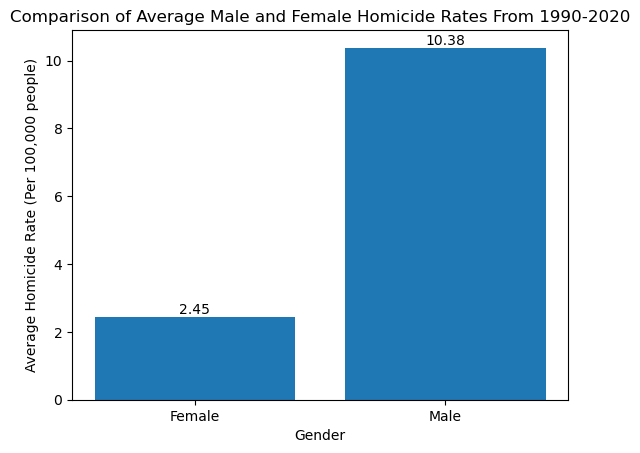

In [30]:
#Averages of Male and female homicide rates from 1990-2020
# Calculate the averages
avg_female = world_gender_df['Female Value'].mean()
avg_male = world_gender_df['Male Value'].mean()

# Create a bar graph
plt.bar(['Female', 'Male'], [avg_female, avg_male])
plt.xlabel('Gender')
plt.ylabel('Average Homicide Rate (Per 100,000 people)')
plt.title('Comparison of Average Male and Female Homicide Rates From 1990-2020')

plt.text(0, avg_female, f'{avg_female:.2f}', ha='center', va='bottom', color='black', fontsize=10)
plt.text(1, avg_male, f'{avg_male:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.savefig("Images/Fig7.png")
plt.show()

In [31]:
# Data
females = world_gender_df['Female Value']
males = world_gender_df['Male Value']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(females, males, equal_var=False)

alpha = 0.01  # significance level

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

T-statistic: -50.59165310910182
P-value: 7.480527958045203e-35
Reject the null hypothesis: There is a significant difference between the groups.


In [32]:
#Export data from csv
GDP_raw_data=pd.read_csv("Resources/GDP_data via country.csv")
Incomegroup_raw=pd.read_csv("Resources/Country_via IncomeGroup.csv")

#delete unwanted rows to created the column header, reindex starting from 0
GDP_raw_data=GDP_raw_data.drop([0,1,2])
GDP_raw_data.reset_index(inplace=True,drop=True)

header=GDP_raw_data.iloc[0]
GDP_data=GDP_raw_data[1:]
GDP_data.columns=header

#Merge GDP and Incomegroup data and drop unwanted columns (via column name and index number)
GDP_income_merge=pd.merge(GDP_data, Incomegroup_raw)

GDP_income_merge.drop(columns=["Indicator Name", "Indicator Code","Unnamed: 5", "Region", "SpecialNotes", "TableName"],axis=1, inplace=True)
GDP_income_merge=GDP_income_merge.drop(GDP_income_merge.iloc[:, 2:37], axis=1)
GDP_income_merge_df=GDP_income_merge.drop(GDP_income_merge.iloc[:, 23:30], axis=1)

#Drop missing values column and rows
GDP_income_merge=GDP_income_merge_df.dropna(axis=1,how="all")
GDP_income_merge_drop=GDP_income_merge.dropna()

#Displays all the rows in dataframe and sort in alphabetical order via country name
pd.set_option("display.max_rows", None)
GDP_income_merge_sort=GDP_income_merge_drop.sort_values("Country Name")
GDP_income_merge_sort
GDP_income_merge_sort.reset_index(inplace=True,drop=True)
GDP_income_merge_sort


Country Name Country Code        1995.0        1996.0  \
0                           Albania          ALB    750.604449   1009.977114   
1                           Algeria          DZA   1466.544691   1619.532403   
2                           Andorra          AND  18731.650685  19081.537962   
3                            Angola          AGO    399.735558    523.310909   
4               Antigua and Barbuda          ATG   8440.034526   9079.481212   
5                         Argentina          ARG   7383.704510   7690.157003   
6                           Armenia          ARM    441.894002    484.091641   
7                             Aruba          ABW  17140.433369  17375.225306   
8                         Australia          AUS  20446.719847  22020.079799   
9                           Austria          AUT  30325.849582  29809.076773   
10                       Azerbaijan          AZE    314.558197    409.185623   
11                     Bahamas, The          BHS  11447.017900  11835.386790   
12                          Bahrain          BHR   9543.390109   9643.309528   
13                       Bangladesh          BGD    322.087390    387.384863   
14                         Barbados          BRB   8451.958599   8994.324063   
15                          Belarus          BLR   1370.699283   1452.507105   
16                          Belgium          BEL  28413.826439  27489.555177   
17                           Belize          BLZ   4021.006504   4057.853603   
18                            Benin          BEN    358.822987    380.588287   
19                          Bermuda          BMU  33989.723161  44826.789070   
20                           Bhutan          BTN    550.656234    564.486939   
21                          Bolivia          BOL    856.365113    925.849119   
22           Bosnia and Herzegovina          BIH    497.682847    712.953646   
23                         Botswana          BWA   3064.586353   3063.994873   
24                           Brazil          BRA   4704.961546   5121.905407   
25                Brunei Darussalam          BRN  15827.987364  16706.471326   
26                         Bulgaria          BGR   2259.264831   1470.195347   
27                     Burkina Faso          BFA    229.832660    243.526923   
28                          Burundi          BDI    168.627168    146.536183   
29                       Cabo Verde          CPV   1184.176735   1192.329989   
30                         Cambodia          KHM    315.142348    313.584672   
31                         Cameroon          CMR    822.363213    817.184094   
32                           Canada          CAN  20678.950442  21296.634422   
33         Central African Republic          CAF    340.399680    299.619490   
34                             Chad          TCD    209.892600    223.233388   
35                            Chile          CHL   5094.505484   5376.149433   
36                            China          CHN    609.604362    709.415888   
37                         Colombia          COL   2571.468190   2652.103881   
38                          Comoros          COM    823.676610    801.261221   
39                 Congo, Dem. Rep.          COD    130.376256    130.816496   
40                      Congo, Rep.          COG    771.613946    902.045746   
41                       Costa Rica          CRI   3240.711145   3194.112988   
42                    Cote d'Ivoire          CIV    769.255684   1220.121444   
43                          Croatia          HRV   4930.337203   5298.886377   
44                             Cuba          CUB   2784.902605   2281.975550   
45                           Cyprus          CYP  15261.410156  15139.226562   
46                          Czechia          CZE   5823.974997   6532.905243   
47                          Denmark          DNK  35351.575797  35650.888282   
48                         Djibouti          DJI    790.516107    766.315697   
49                     

In [33]:
#Rename columns/column entry
GDP_income_merge_sort=GDP_income_merge_sort.rename(columns={"IncomeGroup":"Country's Income tier"})
GDP_income_merge_group=GDP_income_merge_sort.groupby("Country's Income tier",sort=True, group_keys=True).apply(lambda x: x)

#GDP_income_merge_group
#GDP_income_merge_group.reset_index(inplace=True, drop=True)
GDP_income_merge_group

Country Name Country Code  \
Country's Income tier                                                    
High income           2                           Andorra          AND   
                      4               Antigua and Barbuda          ATG   
                      7                             Aruba          ABW   
                      8                         Australia          AUS   
                      9                           Austria          AUT   
                      11                     Bahamas, The          BHS   
                      12                          Bahrain          BHR   
                      14                         Barbados          BRB   
                      16                          Belgium          BEL   
                      19                          Bermuda          BMU   
                      25                Brunei Darussalam          BRN   
                      32                           Canada          CAN   
                      35                            Chile          CHL   
                      43                          Croatia          HRV   
                      45                           Cyprus          CYP   
                      46                          Czechia          CZE   
                      47                          Denmark          DNK   
                      55                          Estonia          EST   
                      59                          Finland          FIN   
                      60                           France          FRA   
                      61                 French Polynesia          PYF   
                      65                          Germany          DEU   
                      67                           Greece          GRC   
                      68                        Greenland          GRL   
                      73                           Guyana          GUY   
                      76             Hong Kong SAR, China          HKG   
                      77                          Hungary          HUN   
                      78                          Iceland          ISL   
                      83                          Ireland          IRL   
                      84                      Isle of Man          IMN   
                      85                           Israel          ISR   
                      86                            Italy          ITA   
                      88                            Japan          JPN   
                      93                      Korea, Rep.          KOR   
                      94                           Kuwait          KWT   
                      97                           Latvia          LVA   
                      101                   Liechtenstein          LIE   
                      102                       Lithuania          LTU   
                      103                      Luxembourg          LUX   
                      104                Macao SAR, China          MAC   
                      110                           Malta          MLT   
                      117                          Monaco          MCO   
                      124                     Netherlands          NLD   
                      125                   New Caledonia          NCL   
                      126                     New Zealand          NZL   
                      131                          Norway          NOR   
                      132                            Oman          OMN   
                      134                          Panama          PAN   
                      139                          Poland          POL   
                      140                        Portugal          PRT   
                      141                     Puerto Rico          PRI   
                      142                           Qatar          QAT   
                      143                        

In [34]:
#Find average percent change per year of all data values in a column using 'for' loop
GDP_j=[]
GDP_j1=[]

for row in GDP_income_merge_sort.iterrows():
    for column in GDP_income_merge_sort.columns[2:23]:
        GDP_j.append(GDP_income_merge_sort[column])
    
    Avg_Percent_Increase=((((GDP_j[1]-GDP_j[0])/GDP_j[0])+((GDP_j[2]-GDP_j[1])/GDP_j[1])+((GDP_j[3]-GDP_j[2])/GDP_j[2])+((GDP_j[4]-GDP_j[3])/GDP_j[3])+((GDP_j[5]-GDP_j[4])/GDP_j[4])+((GDP_j[6]-GDP_j[5])/GDP_j[5])+((GDP_j[7]-GDP_j[6])/GDP_j[6])+((GDP_j[8]-GDP_j[7])/GDP_j[7])+((GDP_j[9]-GDP_j[8])/GDP_j[8])+((GDP_j[10]-GDP_j[9])/GDP_j[9])+((GDP_j[11]-GDP_j[10])/GDP_j[10])+((GDP_j[12]-GDP_j[11])/GDP_j[11])+((GDP_j[13]-GDP_j[12])/GDP_j[12])+((GDP_j[14]-GDP_j[13])/GDP_j[13])+((GDP_j[15]-GDP_j[14])/GDP_j[14])+((GDP_j[16]-GDP_j[15])/GDP_j[15])+((GDP_j[17]-GDP_j[16])/GDP_j[16])+((GDP_j[18]-GDP_j[17])/GDP_j[17])+((GDP_j[19]-GDP_j[18])/GDP_j[18])+((GDP_j[20]-GDP_j[19])/GDP_j[19]))/20)*100
    GDP_j1.append(Avg_Percent_Increase)
    
GDP_j1[0]
    
    

0       9.808016
1       6.257869
2       4.214535
3      13.850396
4       3.050531
5       6.127592
6      12.311641
7       2.669728
8       5.919733
9       2.306937
10     17.414265
11      5.765451
12      4.917093
13      7.103717
14      3.658306
15      9.021469
16      2.241522
17      2.185616
18      6.183944
19      5.964444
20      8.563708
21      6.723367
22     12.563623
23      3.943484
24      4.723286
25      4.812199
26      7.309604
27      5.765057
28      3.142681
29      5.884564
30      7.026543
31      3.087387
32      4.157107
33      0.882071
34      8.326223
35      5.660193
36     13.947552
37      5.369582
38      2.851622
39     16.753080
40      7.631341
41      6.700082
42      5.605635
43      5.177618
44      5.438625
45      2.656166
46      6.404497
47      2.437580
48      6.173481
49      3.440276
50      6.816767
51      6.229495
52      7.018223
53      4.557333
54     25.389221
55      9.780907
56      4.523014
57      8.833457
58      4.4001

In [35]:
#Dataframe for Pertinent Categories
Avg_Percent_Increase_df=pd.DataFrame({"Country":GDP_income_merge_sort["Country Name"],"Average % change in GDP per year(1995-2015)":GDP_j1[0], "%change in Homicide rate":Homicide_df_final["% change earliest to latest data"],"Country's Income Tier":GDP_income_merge_sort["Country's Income tier"]})
Avg_Percent_Increase_group=Avg_Percent_Increase_df.groupby("Country's Income Tier",sort=True, group_keys=True).apply(lambda x: x)
Avg_Percent_Change_GDP_Homicide=Avg_Percent_Increase_group.dropna()
Avg_Percent_Change_GDP_Homicide

Country  \
Country's Income Tier                                
High income           2                    Andorra   
                      4        Antigua and Barbuda   
                      7                      Aruba   
                      8                  Australia   
                      9                    Austria   
                      11              Bahamas, The   
                      12                   Bahrain   
                      14                  Barbados   
                      16                   Belgium   
                      19                   Bermuda   
                      25         Brunei Darussalam   
                      32                    Canada   
                      35                     Chile   
                      43                   Croatia   
                      45                    Cyprus   
                      46                   Czechia   
                      47                   Denmark   
                      55                   Estonia   
                      59                   Finland   
                      60                    France   
Low income            27              Burkina Faso   
                      28                   Burundi   
                      33  Central African Republic   
                      34                      Chad   
                      39          Congo, Dem. Rep.   
                      57                  Ethiopia   
Lower middle income   1                    Algeria   
                      3                     Angola   
                      13                Bangladesh   
                      18                     Benin   
                      20                    Bhutan   
                      21                   Bolivia   
                      29                Cabo Verde   
                      30                  Cambodia   
                      31                  Cameroon   
                      38                   Comoros   
                      40               Congo, Rep.   
                      42             Cote d'Ivoire   
                      48                  Djibouti   
                      52          Egypt, Arab Rep.   
                      56                  Eswatini   
Upper middle income   5                  Argentina   
                      6                    Armenia   
                      10                Azerbaijan   
                      15                   Belarus   
                      17                    Belize   
                      22    Bosnia and Herzegovina   
                      23                  Botswana   
                      24                    Brazil   
                      26                  Bulgaria   
                      36                     China   
                      37                  Colombia   
                      41                Costa Rica   
                      44                      Cuba   
                      49                  Dominica   
                      50        Dominican Republic   
                      51                   Ecuador   
                      53               El Salvador   
                      54         Equatorial Guinea   
                      58                      Fiji   

                          Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                   
High income           2                                      4.214535   
                      4                                      3.050531   
                      7                                      2.669728   
                      8                                      5.919733   
                      9                                      2.306937   
                      11                                     5.765451   
                      12                                     4.917093   
                      14             

In [36]:
plt.figure(figsize=(15,7))
x_axis=Avg_Percent_Change_GDP_Homicide["Country"]
y_axis=Avg_Percent_Change_GDP_Homicide["Average % change in GDP per year(1995-2015)"]
#plt.bar(x_axis, y_axis, alpha=0.75,align="center", width=0.8)
ax=sns.barplot(x="Country", y="Average % change in GDP per year(1995-2015)", data=Avg_Percent_Change_GDP_Homicide, hue="Country's Income Tier", dodge=False)
plt.xlabel("Country")
plt.ylabel("Average % change in GDP per year")
plt.xticks(rotation="vertical")
plt.title("Average % change in GDP per year from 1995-2015")
plt.savefig("Images/Fig8.png")
plt.show()

In [37]:
x_axis=Avg_Percent_Change_GDP_Homicide["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=Avg_Percent_Change_GDP_Homicide["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(13,-25),fontsize=15,color="red")
plt.annotate(r, (15,-30), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year")
plt.ylabel("% Change in Homicide Rates")
plt.title("% Change in GDP per year (1995-2015) vs % change in Homicide rates")
plt.savefig("Images/Fig9.png")
plt.show()

In [38]:
#Scatter plot for the high income countries to determine correlation between GDP and Homicide rates
High_Income=Avg_Percent_Change_GDP_Homicide[Avg_Percent_Change_GDP_Homicide["Country's Income Tier"]=="High income"]
x_axis=High_Income["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=High_Income["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.annotate(r, (5,-25), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year (High Income Country)")
plt.ylabel("% Change in Homicide Rates")
plt.title("% change in GDP per year (1995-2015) vs % change in Homicide rates")
plt.savefig("Images/Fig10.png")
plt.show()

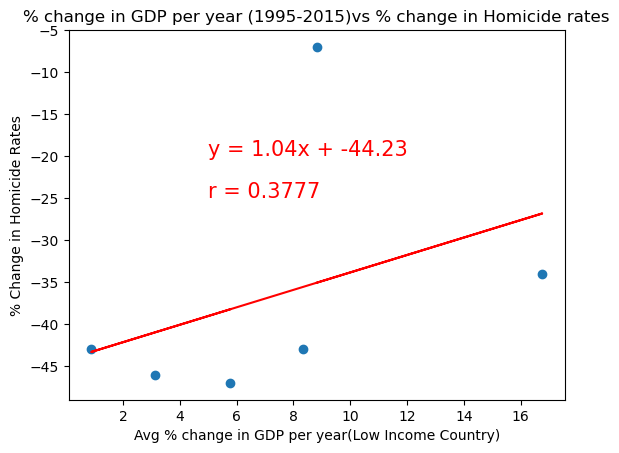

In [39]:
#Scatter plot for the low income countries to determine correlation between GDP and Homicide rates
Low_Income=Avg_Percent_Change_GDP_Homicide[Avg_Percent_Change_GDP_Homicide["Country's Income Tier"]=="Low income"]
x_axis=Low_Income["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=Low_Income["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.annotate(r, (5,-25), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year(Low Income Country)")
plt.ylabel("% Change in Homicide Rates")
plt.title("% change in GDP per year (1995-2015)vs % change in Homicide rates")
plt.savefig("Images/Fig11.png")
plt.show()

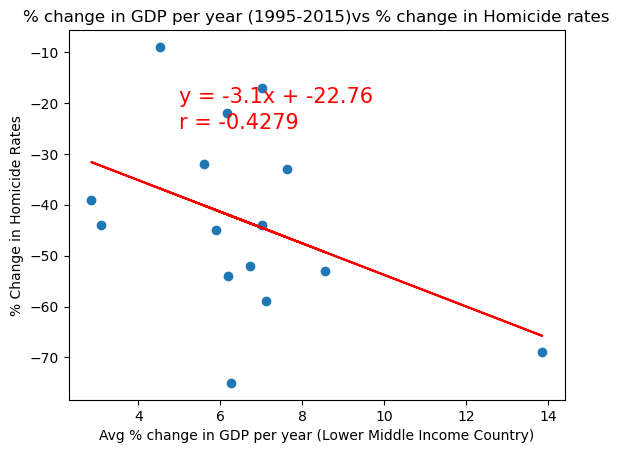

In [40]:
#Scatter plot fot the high income countries to determine correlation between GDP and Homicide rates
Low_middle_Income=Avg_Percent_Change_GDP_Homicide.loc[Avg_Percent_Change_GDP_Homicide["Country's Income Tier"]=="Lower middle income"]
x_axis=Low_middle_Income["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=Low_middle_Income["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.annotate(r, (5,-25), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year (Lower Middle Income Country)")
plt.ylabel("% Change in Homicide Rates")
plt.title("% change in GDP per year (1995-2015)vs % change in Homicide rates")
plt.savefig("Images/Fig12.png")
plt.show()

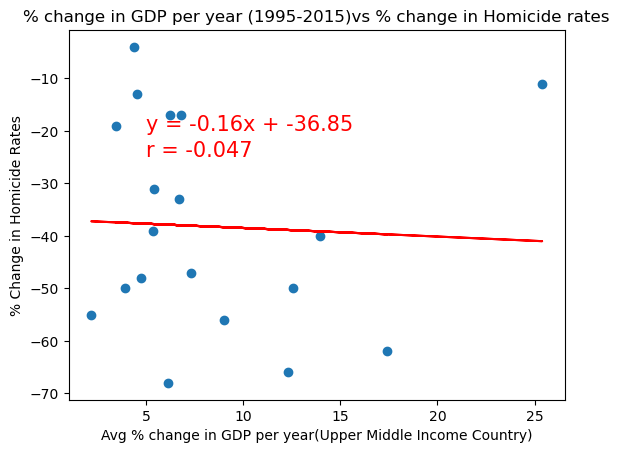

In [41]:
Upper_middle_Income=Avg_Percent_Change_GDP_Homicide.loc[Avg_Percent_Change_GDP_Homicide["Country's Income Tier"]=="Upper middle income"]
x_axis=Upper_middle_Income["Average % change in GDP per year(1995-2015)"].astype("float")
y_axis=Upper_middle_Income["%change in Homicide rate"].astype("float")
(slope, intercept, rvalue, pvalue, stderr) =linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r = "r = " + str(round(rvalue,4))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(5,-20),fontsize=15,color="red")
plt.annotate(r, (5,-25), fontsize=15, color="red")
plt.xlabel("Avg % change in GDP per year(Upper Middle Income Country)")
plt.ylabel("% Change in Homicide Rates")
plt.title("% change in GDP per year (1995-2015)vs % change in Homicide rates")
plt.savefig("Images/Fig13.png")
plt.show()

In [42]:
top_5=Avg_Percent_Change_GDP_Homicide.sort_values("%change in Homicide rate", ascending=False)
top_5.head()

Country  \
Country's Income Tier                
Upper middle income   58      Fiji   
High income           60    France   
                      59   Finland   
Low income            57  Ethiopia   
Lower middle income   56  Eswatini   

                          Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                   
Upper middle income   58                                     4.400193   
High income           60                                     1.953031   
                      59                                     2.886309   
Low income            57                                     8.833457   
Lower middle income   56                                     4.523014   

                          %change in Homicide rate Country's Income Tier  
Country's Income Tier                                                     
Upper middle income   58                      -4.0   Upper middle income  
High income           60                      -4.0           High income  
                      59                      -4.0           High income  
Low income            57                      -7.0            Low income  
Lower middle income   56                      -9.0   Lower middle income

In [43]:
bottom_5=Avg_Percent_Change_GDP_Homicide.sort_values("%change in Homicide rate", ascending=True)
bottom_5.head()

Country  \
Country's Income Tier                          
Lower middle income   1              Algeria   
High income           2              Andorra   
Lower middle income   3               Angola   
High income           4  Antigua and Barbuda   
Upper middle income   5            Argentina   

                         Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                  
Lower middle income   1                                     6.257869   
High income           2                                     4.214535   
Lower middle income   3                                    13.850396   
High income           4                                     3.050531   
Upper middle income   5                                     6.127592   

                         %change in Homicide rate Country's Income Tier  
Country's Income Tier                                                    
Lower middle income   1                     -75.0   Lower middle income  
High income           2                     -70.0           High income  
Lower middle income   3                     -69.0   Lower middle income  
High income           4                     -69.0           High income  
Upper middle income   5                     -68.0   Upper middle income

In [44]:
top_5_GDP=Avg_Percent_Change_GDP_Homicide.sort_values("Average % change in GDP per year(1995-2015)", ascending=False)
top_5_GDP.head()

Country  \
Country's Income Tier                         
Upper middle income   54  Equatorial Guinea   
                      10         Azerbaijan   
Low income            39   Congo, Dem. Rep.   
Upper middle income   36              China   
Lower middle income   3              Angola   

                          Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                   
Upper middle income   54                                    25.389221   
                      10                                    17.414265   
Low income            39                                    16.753080   
Upper middle income   36                                    13.947552   
Lower middle income   3                                     13.850396   

                          %change in Homicide rate Country's Income Tier  
Country's Income Tier                                                     
Upper middle income   54                     -11.0   Upper middle income  
                      10                     -62.0   Upper middle income  
Low income            39                     -34.0            Low income  
Upper middle income   36                     -40.0   Upper middle income  
Lower middle income   3                      -69.0   Lower middle income

In [45]:
bottom_5_GDP=Avg_Percent_Change_GDP_Homicide.sort_values("Average % change in GDP per year(1995-2015)", ascending=True)
bottom_5_GDP.head()

Country  \
Country's Income Tier                                
Low income            33  Central African Republic   
High income           60                    France   
Upper middle income   17                    Belize   
High income           16                   Belgium   
                      9                    Austria   

                          Average % change in GDP per year(1995-2015)  \
Country's Income Tier                                                   
Low income            33                                     0.882071   
High income           60                                     1.953031   
Upper middle income   17                                     2.185616   
High income           16                                     2.241522   
                      9                                      2.306937   

                          %change in Homicide rate Country's Income Tier  
Country's Income Tier                                                     
Low income            33                     -43.0            Low income  
High income           60                      -4.0           High income  
Upper middle income   17                     -55.0   Upper middle income  
High income           16                     -55.0           High income  
                      9                      -65.0           High income

In [46]:
#base_df = pd.read_csv("Resources/Homicides Are Falling Around the World - Homicides Are Falling Around the World.csv")
base_df = pd.read_csv("Resources/Homicides Are Falling Around the World - Homicides Are Falling Around the World_cleaned.csv")
base_df = base_df.drop(columns= ["earliest figure", 'source', 'URL', 'latest figure'])
lit_df = pd.read_csv("Resources/API_SE.ADT.LITR.ZS_DS2_en_csv_v2_5728795.csv")
lit_df = lit_df.drop(columns = ["Country Code", "Indicator Code"])

In [47]:
#For loop was used to reorder the data in a different format with columns being years and rows being the rates
#The years are all in one column and the rates in another. 
#The country names are repeated multiple times, once for each year that is on record.
reorderedbase = pd.DataFrame(columns = {"country":"", "year":"","rate":""})
temp = {}
temp["country"]=[]
temp["year"]=[]
temp["rate"] = []
for index, row in base_df.iterrows():
    temp["country"].append(base_df.iloc[index][0])
    temp["year"].append(base_df.iloc[index][2:].index.tolist())
    temp["rate"].append(base_df.iloc[index][2:].values.tolist())
    tempdf = pd.DataFrame({"country": temp["country"][index],"year":temp["year"][index],"rate":temp["rate"][index]})
    reorderedbase = pd.concat([reorderedbase,tempdf])
#pd.DataFrame({"country": tst["country"][0],"year":tst["year"][0],"rate":tst["rate"][0]})
reorderedbase = reorderedbase.reset_index()
reorderedbase

index          country  year    rate
0         0          Croatia  1995    3.56
1         1          Croatia  1996    2.62
2         2          Croatia  1997    2.55
3         3          Croatia  1998    2.86
4         4          Croatia  1999    2.67
5         5          Croatia  2000    2.30
6         6          Croatia  2001    1.80
7         7          Croatia  2002    1.70
8         8          Croatia  2003    1.50
9         9          Croatia  2004    1.90
10       10          Croatia  2005    1.50
11       11          Croatia  2006    1.60
12       12          Croatia  2007    1.40
13       13          Croatia  2008    1.50
14       14          Croatia  2009    1.10
15       15          Croatia  2010    1.40
16       16          Croatia  2011    1.10
17       17          Croatia  2012    1.20
18       18          Croatia  2013    1.10
19       19          Croatia  2014    0.80
20       20          Croatia  2015    0.90
21        0         Bulgaria  1995    5.91
22        1         Bulgaria  1996    5.29
23        2         Bulgaria  1997    4.85
24        3         Bulgaria  1998    4.69
25        4         Bulgaria  1999    4.05
26        5         Bulgaria  2000     NaN
27        6         Bulgaria  2001     NaN
28        7         Bulgaria  2002     NaN
29        8         Bulgaria  2003    3.20
30        9         Bulgaria  2004    3.20
31       10         Bulgaria  2005    2.60
32       11         Bulgaria  2006    2.40
33       12         Bulgaria  2007    2.30
34       13         Bulgaria  2008    2.30
35       14         Bulgaria  2009    2.00
36       15         Bulgaria  2010    2.00
37       16         Bulgaria  2011    1.70
38       17         Bulgaria  2012    1.90
39       18         Bulgaria  2013    1.50
40       19         Bulgaria  2014    1.60
41       20         Bulgaria  2015    1.80
42        0      Netherlands  1995    1.94
43        1      Netherlands  1996    1.36
44        2      Netherlands  1997    1.33
45        3      Netherlands  1998    1.12
46        4      Netherlands  1999    1.29
47        5      Netherlands  2000    1.10
48        6      Netherlands  2001    1.30
49        7      Netherlands  2002    1.20
50        8      Netherlands  2003    1.20
51        9      Netherlands  2004    1.20
52       10      Netherlands  2005    1.10
53       11      Netherlands  2006    0.80
54       12      Netherlands  2007    0.90
55       13      Netherlands  2008    0.90
56       14      Netherlands  2009    0.90
57       15      Netherlands  2010    0.90
58       16      Netherlands  2011    0.90
59       17      Netherlands  2012    0.90
60       18      Netherlands  2013    0.70
61       19      Netherlands  2014    0.70
62       20      Netherlands  2015    0.60
63        0       Kazakhstan  1995   15.36
64        1       Kazakhstan  1996   16.71
65        2       Kazakhstan  1997   16.67
66        3       Kazakhstan  1998   16.58
67        4       Kazakhstan  1999   15.74
68        5       Kazakhstan  2000   15.50
69        6       Kazakhstan  2001   14.50
70        7       Kazakhstan  2002   13.10
71        8       Kazakhstan  2003   13.20
72        9       Kazakhstan  2004   13.70
73       10       Kazakhstan  2005   11.70
74       11       Kazakhstan  2006   11.10
75       12       Kazakhstan  2007   10.50
76       13       Kazakhstan  2008   11.40
77       14       Kazakhstan  2009   11.00
78       15       Kazakhstan  2010    8.60
79       16       Kazakhstan  2011    8.60
80       17       Kazakhstan  2012    7.50
81       18       Kazakhstan  2013    6.50
82       19       Kazakhstan  2014    5.20
83       20       Kazakhstan  2015    4.80
84        0           Poland  1995    2.22
85        1           Poland  1996    2.27
86        2           Poland  1997    2.10
87        3           Poland  1998    4.87
88        4           Poland  1999    4.75
89        5           Poland  2000    2.20
90        6           Poland  2001    2.00
91        7           Poland  2002    1.90
92     

In [48]:
reorderedlit = pd.DataFrame(columns = {"country":"", "year":"","literacy":""})
temp= {}
temp["country"]=[]
temp["year"]=[]
temp["literacy"] = []
for index, row in lit_df.iterrows():
    temp["country"].append(lit_df.iloc[index][0])
    temp["year"].append(lit_df.iloc[index][2:].index.tolist())
    temp["literacy"].append(lit_df.iloc[index][2:].values.tolist())
    tempdf = pd.DataFrame({"country": temp["country"][index],"year":temp["year"][index],"literacy":temp["literacy"][index]})
    reorderedlit = pd.concat([reorderedlit,tempdf])
#pd.DataFrame({"country": tst["country"][0],"year":tst["year"][0],"rate":tst["rate"][0]})
reorderedlit = reorderedlit.reset_index()
reorderedlit

index                                            country  year  \
0          0                                              Aruba  1960   
1          1                                              Aruba  1961   
2          2                                              Aruba  1962   
3          3                                              Aruba  1963   
4          4                                              Aruba  1964   
5          5                                              Aruba  1965   
6          6                                              Aruba  1966   
7          7                                              Aruba  1967   
8          8                                              Aruba  1968   
9          9                                              Aruba  1969   
10        10                                              Aruba  1970   
11        11                                              Aruba  1971   
12        12                                              Aruba  1972   
13        13                                              Aruba  1973   
14        14                                              Aruba  1974   
15        15                                              Aruba  1975   
16        16                                              Aruba  1976   
17        17                                              Aruba  1977   
18        18                                              Aruba  1978   
19        19                                              Aruba  1979   
20        20                                              Aruba  1980   
21        21                                              Aruba  1981   
22        22                                              Aruba  1982   
23        23                                              Aruba  1983   
24        24                                              Aruba  1984   
25        25                                              Aruba  1985   
26        26                                              Aruba  1986   
27        27                                              Aruba  1987   
28        28                                              Aruba  1988   
29        29                                              Aruba  1989   
30        30                                              Aruba  1990   
31        31                                              Aruba  1991   
32        32                                              Aruba  1992   
33        33                                              Aruba  1993   
34        34                                              Aruba  1994   
35        35                                              Aruba  1995   
36        36                                              Aruba  1996   
37        37                                              Aruba  1997   
38        38                                              Aruba  1998   
39        39                                              Aruba  1999   
40        40                                              Aruba  2000   
41        41                                              Aruba  2001   
42        42                                              Aruba  2002   
43        43                                              Aruba  2003   
44        44                                              Aruba  2004   
45        45                                              Aruba  2005   
46        46                                              Aruba  2006   
47        47                                              Aruba  2007   
48        48                                              Aruba  2008   
49        49                                              Aruba  2009   
50        50                                              Aruba  2010   
51        51                                              Aruba  2011   
52        52                                              Aruba  2012   
53        53                                              Aruba  

In [49]:
#Groupby and merge functions used to find the first and last year a country has data for both literacy and homicides

merged_df = reorderedbase.merge(reorderedlit, on = ["country","year"], how = 'outer')
merged_df = merged_df.dropna()
grouped = merged_df.groupby("country")
maxtime = grouped["year"].max()
mintime = grouped["year"].min()
merged_df = merged_df.merge(maxtime,on = ["country"], how = 'outer')
merged_df = merged_df.merge(mintime,on = ["country"], how = 'outer')
merged_df = merged_df.loc[merged_df['year_y'] != merged_df['year']]
merged_df = merged_df.loc[merged_df['year_y'] != merged_df['year']]
merged_df = merged_df.drop(columns = ['index_x','index_y'])
merged_df = merged_df.rename(columns = {"year":"earliest year","year_y":"latest year","year_x":"index year"})
merged_df

country index year    rate   literacy latest year earliest year
0            Croatia       2001    1.80  98.146683        2011          2001
1            Croatia       2011    1.10  99.125359        2011          2001
3         Kazakhstan       1999   15.74  99.512657        2010          1999
4         Kazakhstan       2009   11.00  99.732407        2010          1999
5         Kazakhstan       2010    8.60  99.781631        2010          1999
6             Poland       1998    4.87  98.742737        2008          1998
7             Poland       2008    1.20  98.742737        2008          1998
8            Albania       2008    3.10  95.938637        2012          2008
9            Albania       2011    4.90  96.845299        2012          2008
10           Albania       2012    5.50  97.246971        2012          2008
12           Georgia       2002    6.30  99.652351        2014          2002
13           Georgia       2014    2.70  99.586189        2014          2002
14           Moldova       2000   10.30  96.653801        2014          2000
15           Moldova       2014    3.20  99.359894        2014          2000
16          Colombia       1996   71.79  91.207161        2015          1996
17          Colombia       2004   44.60  92.803780        2015          1996
18          Colombia       2005   39.50  92.848663        2015          1996
19          Colombia       2006   36.80  92.299683        2015          1996
20          Colombia       2007   34.80  92.651787        2015          1996
21          Colombia       2008   33.20  93.378181        2015          1996
22          Colombia       2009   34.00  93.244690        2015          1996
23          Colombia       2010   32.70  93.372330        2015          1996
24          Colombia       2011   34.10  93.580528        2015          1996
25          Colombia       2014   27.90  94.186249        2015          1996
26          Colombia       2015   26.50  94.245049        2015          1996
27           Belarus       1999    9.64  99.590729        2009          1999
28           Belarus       2009    5.00  99.617058        2009          1999
30   Kyrgyz Republic       1999    8.84  98.701607        2009          1999
31   Kyrgyz Republic       2009    7.80  99.243431        2009          1999
32           Romania       2002    2.60  97.297592        2011          2002
33           Romania       2011    1.70  98.604286        2011          2002
34             Italy       2001    1.20  98.416618        2011          2001
35             Italy       2011    0.90  98.848282        2011          2001
36            Serbia       2003    1.90  96.397240        2011          2003
37            Serbia       2011    1.50  97.962410        2011          2003
38          Thailand       2000    8.20  92.646538        2015          2000
39          Thailand       2005    7.30  93.506470        2015          2000
40          Thailand       2010    5.50  96.430908        2015          2000
41          Thailand       2013    4.30  93.702072        2015          2000
42          Thailand       2015    3.50  92.868309        2015          2000
43         Indonesia       2004    0.60  90.384789        2014          2004
44         Indonesia       2008    0.60  92.192299        2014          2004
45         Indonesia       2009    0.50  92.581703        2014          2004
46         Indonesia       2011    0.60  92.811913        2014          2004
47         Indonesia       2014    0.50  95.116219        2014          2004
50           Morocco       2004    1.60  52.306259        2014          2004
51           Morocco       2008    1.40  55.147919        2014          2004
52           Morocco       2009    1.40  56.083672        2014          2004
53           Morocco       2011    1.40  67.084160        2014          2004
54           Morocco       2012    1.20  69.425392        2014          2004
55           Morocco       2014    1.00  75.586197        2014          2004
56      S

In [50]:
country = []
percentliteracyscore = []
for i in merged_df["country"]:
        percentliteracyscore.append(((merged_df.loc[(merged_df["index year"] == merged_df["latest year"]) & (merged_df["country"] == i)]["literacy"].reset_index(drop=True) 
                                     - merged_df.loc[(merged_df["index year"] == merged_df.loc[merged_df["country"] == i]["index year"].min()) & (merged_df["country"] == i)]["literacy"].reset_index(drop=True)) 
                                    / merged_df.loc[(merged_df["index year"] == merged_df["earliest year"]) & (merged_df["country"] == i)]["literacy"].reset_index(drop=True)).iloc[0])
        country.append(i)      
percentliteracyscore = np.round(percentliteracyscore, 2)
percentliteracyscore = percentliteracyscore * 100
percentliteracyscore_df = pd.DataFrame({"Country": country,
                                      "% Change in lit rate": percentliteracyscore})
percentliteracyscore_df = percentliteracyscore_df.sort_values(by="% Change in lit rate", ascending=False)
percentliteracyscore_df = percentliteracyscore_df.rename(columns = {"% Change in lit rate":"% Change in literacy rate"})
percentliteracyscore_df

Country  % Change in literacy rate
49           Morocco                       45.0
45           Morocco                       45.0
50           Morocco                       45.0
47           Morocco                       45.0
48           Morocco                       45.0
46           Morocco                       45.0
119            Nepal                       23.0
120            Nepal                       23.0
122        Guatemala                       18.0
123        Guatemala                       18.0
124        Guatemala                       18.0
121        Guatemala                       18.0
54      South Africa                       15.0
55      South Africa                       15.0
53      South Africa                       15.0
52      South Africa                       15.0
57      South Africa                       15.0
58      South Africa                       15.0
56      South Africa                       15.0
51      South Africa                       15.0
100            India                       14.0
99             India                       14.0
98             India                       14.0
108      El Salvador                        5.0
107      El Salvador                        5.0
40         Indonesia                        5.0
41         Indonesia                        5.0
42         Indonesia                        5.0
43         Indonesia                        5.0
106      El Salvador                        5.0
105      El Salvador                        5.0
104      El Salvador                        5.0
103      El Salvador                        5.0
102      El Salvador                        5.0
101      El Salvador                        5.0
44         Indonesia                        5.0
75           Ecuador                        4.0
76           Ecuador                        4.0
77           Ecuador                        4.0
78           Ecuador                        4.0
79           Ecuador                        4.0
80           Ecuador                        4.0
81           Ecuador                        4.0
82           Ecuador                        4.0
83           Ecuador                        4.0
138           Mexico                        4.0
133           Mexico                        4.0
127           Mexico                        4.0
128           Mexico                        4.0
137           Mexico                        4.0
136           Mexico                        4.0
135           Mexico                        4.0
134           Mexico                        4.0
129           Mexico                        4.0
126           Mexico                        4.0
125           Mexico                        4.0
130           Mexico                        4.0
131           Mexico                        4.0
132           Mexico                        4.0
96           Algeria                        3.0
97           Algeria                        3.0
13           Moldova                        3.0
14          Colombia                        3.0
12           Moldova                        3.0
16          Colombia                        3.0
17          Colombia                        3.0
18          Colombia                        3.0
19          Colombia                        3.0
20          Colombia                        3.0
21          Colombia                        3.0
22          Colombia                        3.0
23          Colombia                        3.0
24          Colombia                        3.0
15          Colombia                        3.0
109           Panama                        2.0
33            Serbia                        2.0
34            Serbia                        2.0
110           Panama                        2.0
89             Spain                        1.0
90             Spain                        1.0
87             Spain                        1.0
91             Spain                        1.0
92             Spain         

In [51]:
country = []
percenthomiciderate = []
for i in merged_df["country"]:
        percenthomiciderate.append(((merged_df.loc[(merged_df["index year"] == merged_df["latest year"]) & (merged_df["country"] == i)]["rate"].reset_index(drop=True) 
                                     - merged_df.loc[(merged_df["index year"] == merged_df.loc[merged_df["country"] == i]["index year"].min()) & (merged_df["country"] == i)]["rate"].reset_index(drop=True)) 
                                    / merged_df.loc[(merged_df["index year"] == merged_df["earliest year"]) & (merged_df["country"] == i)]["rate"].reset_index(drop=True)).iloc[0])
        country.append(i)      
percenthomiciderate = np.round(percenthomiciderate, 2)
percenthomiciderate = percenthomiciderate * 100
percenthomiciderate_df = pd.DataFrame({"Country": country,
                                      "% Change in homicide rate": percenthomiciderate})
percenthomiciderate_df = percenthomiciderate_df.sort_values(by="% Change in homicide rate", ascending=False)
percenthomiciderate_df

Country  % Change in homicide rate
110           Panama                      112.0
109           Panama                      112.0
7            Albania                       77.0
8            Albania                       77.0
9            Albania                       77.0
108      El Salvador                       65.0
107      El Salvador                       65.0
106      El Salvador                       65.0
105      El Salvador                       65.0
104      El Salvador                       65.0
103      El Salvador                       65.0
102      El Salvador                       65.0
101      El Salvador                       65.0
138           Mexico                       57.0
126           Mexico                       57.0
125           Mexico                       57.0
127           Mexico                       57.0
128           Mexico                       57.0
129           Mexico                       57.0
130           Mexico                       57.0
131           Mexico                       57.0
132           Mexico                       57.0
133           Mexico                       57.0
134           Mexico                       57.0
135           Mexico                       57.0
136           Mexico                       57.0
137           Mexico                       57.0
70            Greece                       33.0
74            Greece                       33.0
71            Greece                       33.0
73            Greece                       33.0
72            Greece                       33.0
115       Azerbaijan                       25.0
118       Azerbaijan                       25.0
117       Azerbaijan                       25.0
116       Azerbaijan                       25.0
114       Azerbaijan                       25.0
113       Azerbaijan                       25.0
124        Guatemala                        5.0
123        Guatemala                        5.0
122        Guatemala                        5.0
121        Guatemala                        5.0
96           Algeria                        0.0
97           Algeria                        0.0
28   Kyrgyz Republic                      -12.0
27   Kyrgyz Republic                      -12.0
111        Argentina                      -13.0
112        Argentina                      -13.0
120            Nepal                      -17.0
44         Indonesia                      -17.0
43         Indonesia                      -17.0
100            India                      -17.0
99             India                      -17.0
98             India                      -17.0
42         Indonesia                      -17.0
41         Indonesia                      -17.0
40         Indonesia                      -17.0
119            Nepal                      -17.0
33            Serbia                      -21.0
34            Serbia                      -21.0
32             Italy                      -25.0
31             Italy                      -25.0
66          Paraguay                      -29.0
68          Paraguay                      -29.0
67          Paraguay                      -29.0
69          Paraguay                      -29.0
65          Paraguay                      -29.0
63          Paraguay                      -29.0
62          Paraguay                      -29.0
64          Paraguay                      -29.0
29           Romania                      -35.0
30           Romania                      -35.0
78           Ecuador                      -36.0
83           Ecuador                      -36.0
82           Ecuador                      -36.0
81           Ecuador                      -36.0
80           Ecuador                      -36.0
79           Ecuador                      -36.0
76           Ecuador                      -36.0
77           Ecuador                      -36.0
75           Ecuador                      -36.0
47           Morocco                      -38.0
46           Morocco         

In [52]:
#Combined the two previous cell data into a single dataframe
combineddf = percenthomiciderate_df.merge(percentliteracyscore_df, on = "Country", how = 'outer')
combineddf = combineddf.loc[combineddf['% Change in literacy rate'] > 0.0]

In [53]:
#bar chart signifying the murder rate change and the change in literacy rates,
plt.bar(combineddf["Country"], combineddf["% Change in homicide rate"], color ='r', width = .25,
        edgecolor ='grey')
plt.bar(combineddf["Country"], combineddf["% Change in literacy rate"], color ='y', width = .25,
        edgecolor ='grey')
plt.ylim([-80, 120])
plt.legend(["% Change in Homicides","% Change in Overall literacy rate"],loc='best', fontsize = 'small')
plt.xlabel("Countries")
plt.ylabel("Percent Change")
plt.title("% change in homicides vs. % change in Literacy rates")
plt.xticks(rotation = 90)
plt.savefig("Images/Fig14.png")
plt.show()

In [54]:
merged_df.groupby("country").count()

index year  rate  literacy  latest year  earliest year
country                                                                
Albania                   3     3         3            3              3
Algeria                   2     2         2            2              2
Argentina                 2     2         2            2              2
Azerbaijan                6     6         6            6              6
Belarus                   2     2         2            2              2
Colombia                 11    11        11           11             11
Croatia                   2     2         2            2              2
Ecuador                   9     9         9            9              9
El Salvador               8     8         8            8              8
Georgia                   2     2         2            2              2
Greece                    5     5         5            5              5
Guatemala                 4     4         4            4              4
India                     3     3         3            3              3
Indonesia                 5     5         5            5              5
Italy                     2     2         2            2              2
Kazakhstan                3     3         3            3              3
Kyrgyz Republic           2     2         2            2              2
Mexico                   14    14        14           14             14
Moldova                   2     2         2            2              2
Morocco                   6     6         6            6              6
Nepal                     2     2         2            2              2
Panama                    2     2         2            2              2
Paraguay                  8     8         8            8              8
Poland                    2     2         2            2              2
Romania                   2     2         2            2              2
Serbia                    2     2         2            2              2
Slovenia                  3     3         3            3              3
South Africa              8     8         8            8              8
Spain                    12    12        12           12             12
Thailand                  5     5         5            5              5

In [55]:
#Selected countries that have at least 8 data points based on previous cell
shortlist = ['Mexico','Colombia','Spain','Ecuador','El Salvador', 'South Africa']

In [56]:
def regression(x,y,xlabel,ylabel): #need x,y, as well as labels for axes.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y) #relevant regression values
    regline = x*slope + intercept #regression line
    line_eq = "The regression line is y = " + str(round(slope,2))+"*x + " + str(round(intercept,2)) #string of line equation
    plt.plot(x,regline,"r-") #plot fit line
    plt.scatter(x,y) #scatter plot
    plt.annotate(line_eq,(min(x),min(y)), fontsize=10) #write fit line and place it at bottom of plot
    plt.annotate("The r value is " + str(round(rvalue,2)),(min(x),max(y)),fontsize = 10)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(ylabel + " vs. " + xlabel) #title for graph

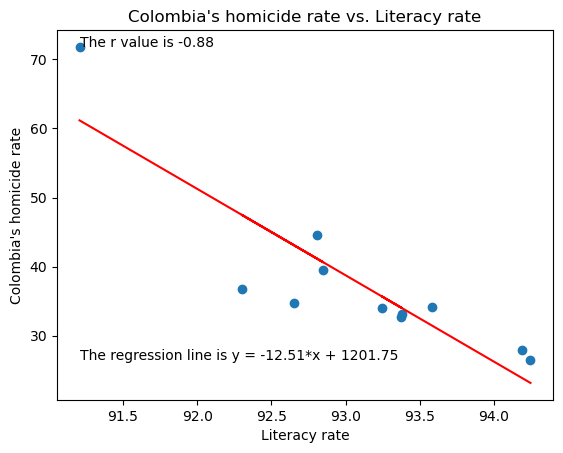

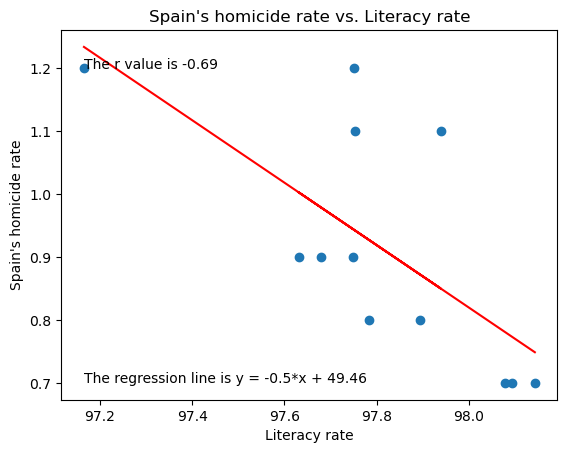

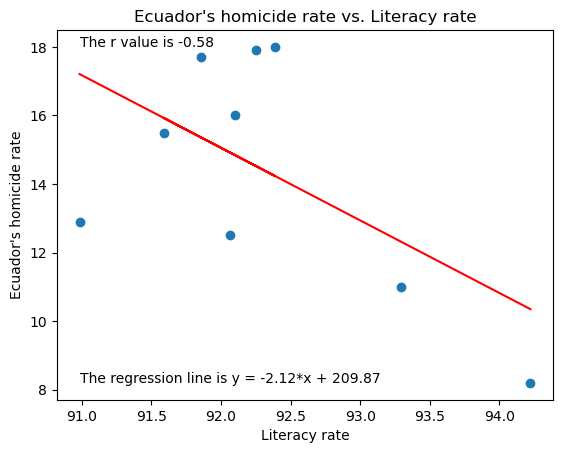

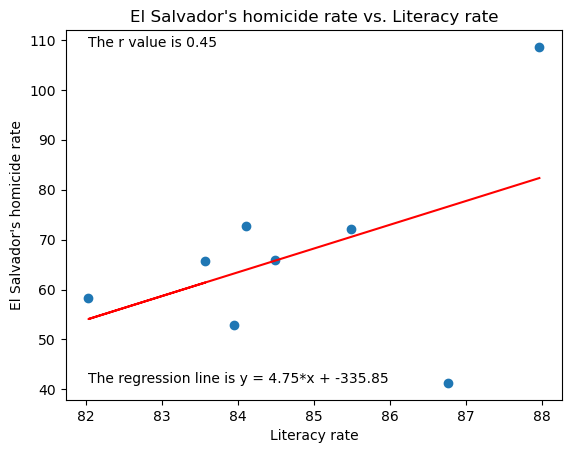

In [58]:
#Used the regression function to plot the points for the 6 countries chosen
for i in range(len(shortlist)):
    regression(merged_df.loc[merged_df['country'] == shortlist[i]]['literacy'],merged_df.loc[merged_df['country'] == shortlist[i]]['rate'],
              "Literacy rate", shortlist[i] + "'s homicide rate")
    plt.savefig("Images/Fig15.png")
    plt.show()

# Homicide Rates & Freedom Scores Analysis


The first question we examined for this project was the correlation between homicide rates and freedom score. The hypothesis was that the decrease in homicide rates was in part caused by the increase in freedom scores. Using data from The Index (heritage.org/index) with the homicide dataset from the World Bar, the datasets were cleaned, organized, and merged. Data was analyzed by percent change and exact figures for homicide rates and freedom scores. Our findings contradicted our hypothesis; while the majority of countries did see an increase in freedom score and a decrease in homicide rates, countries who saw a decrease in freedom score still witnessed a decrease in homicide rates. In some cases, countries who lost freedom score saw a larger decrease in homicide rates than countries that improved their freedom score. The given evidence does not support the idea that freedom scores affect homicide rates.

# Homicide Rates & Gender Analysis


Another Question we aimed to explore in this project was the correlation between homicide rates and gender. We hypothesized that females would have a significantly lower homicide rate as compared to their male counterparts, though both would show a steady decrease over the decades. To perform this analysis, we gathered data from (Gender Data), cleaned the data using Excel, and then merged the male and female datasets by year and country. Our initial hypothesis was supported during the analysis, which showed that females did in fact commit homicides at a much lower rate than males did, though there was a decrease over time for both groups. The average female homicide rate per 100,000 people collectively over all years was 2.45, while for males, it was 10.38. A t-test was performed which determined that this difference is statistically significant at the .01 level.
Some limitations of this data, was that it did not show the type of homicide or reason for homicide. This information could help us gain a better understanding of male vs female motivation for homicide and provide insight on how to deal with these issues on a societal level. For future research, we should also examine the interaction between gender, socioeconomic status, and other variables to see if combinations of certain demographics are more or less likely to commit homicide even if on a country-wide, freedom index and GDP did not seem to be statistically significant.

# Homicide Rates & GDP Analysis


The third question that we explored was the correlation between homicide rates and economic growth (key identifier:GDP). According to literature, crime as a whole imposes significant direct and indirect cost to society and tends to impede economic progress. There is a relationship between crime and economic growth but what about a specific type of crime: homicide? Does an increase in homicide affect economic growth or vice versa. In order to conduct our analysis, we extracted data from world bank (GDP Data), cleaned and merged the data using python to reflect pertinent information. The GDP data and Homicide rates data was analyzed by average % change in GDP/homicides per year . We hypothesized that the decrease in homicide rate from 1995-2015 can be attributed to an increase in Gross Domestic Product (GDP) over that span. In other words, we expect a moderate to strong negative correlation (-1<r<-0.5). According to the graphical analysis, it appears that the decrease in homicide rate over the 20 years span is not correlated to GDP since all the scatter plots (as a whole and grouped by Country’s income level) showed a weak to no correlation as indicated by the coefficient of correlation (r). Thus, the evidence does not support our hypothesis.

# Homicide Rates & Literature Rates Analysis

The fourth question we examined was the correlation between homicide rates and literacy rates. Our hypothesis was that as literacy rates increased, homicide rates would decrease. Using homicide data () and literacy rate data () both from the World Bank, we imported, cleaned, organized, and merged our datasets before performing the analysis you see above.
Our hypothesis did not see clear support among our data. While there were some instances where the data seemed to support the idea of an inverse relationship between literacy rates and homicide, like with South Africa, overall and globally, there just didn't seem to be much support. One thing to note about this, however, is that our data for literacy rates is rather limited. We can only analyze data for which we have both homicide rate and literacy rate in the same year, and many countries only had a handful of datapoints that met that criteria. I personally believe this would benefit from another, more extensive, analysis.